In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale,StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import backend as K

%matplotlib inline





In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

data_yes = pd.read_csv('/content/drive/My Drive/data/symptom_yes_refined.csv',index_col=0)
data_no = pd.read_csv('/content/drive/My Drive/data/symptom_no_refined.csv',index_col=0)


In [ ]:
data_yes = data_yes.drop(columns=["Age", "VNG(%)", "SN"])
data_yes

,Weight,BMI,Gender,Diagnosis,N_Speed,Cadence,Stride_L,Stride_R,Step_L,Step_R,SS_L,SS_R,DS_L,DS_R,Time_Toe_L,Time_Toe_R,ROM_IE_L,ROM_IE_R,ROM_DP_L,ROM_DP_R,ROM_AA_L,ROM_AA_R,GA,PCI,S_Speed,S_Cadence,S_Stride_L,S_Stride_R,S_Step_L,S_Step_R,S_SS_L,S_SS_R,S_DS_L,S_DS_R,S_Time_Toe_L,S_Time_Toe_R,S_ROM_IE_L,S_ROM_IE_R,S_ROM_DP_L,S_ROM_DP_R,S_ROM_AA_L,S_ROM_AA_R,S_GA,S_PCI,F_Speed,F_Cadence,F_Stride_L,F_Stride_R,F_Step_L,F_Step_R,F_SS_L,F_SS_R,F_DS_L,F_DS_R,F_Time_Toe_L,F_Time_Toe_R,F_ROM_IE_L,F_ROM_IE_R,F_ROM_DP_L,F_ROM_DP_R,F_ROM_AA_L,F_ROM_AA_R,F_GA,F_PCI
Height,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
136.5,46.9,25.171410,F,1,4.0,110.0,1.2093,1.2093,0.6046,0.6046,39.2037,37.8254,22.9709,22.9709,62.1746,60.7963,-6.6031,-4.1378,-19.0850,-23.0283,1.9200,2.7903,3.5789,3.9742,3.3,105.0,1.0646,1.0542,0.5323,0.5271,38.7454,37.2671,24.3542,23.3702,63.0996,60.2706,-5.0158,-5.4877,-16.9529,-25.1356,2.1380,2.7651,4.2803,3.6380,4.5,132.0,1.1771,1.1771,0.5885,0.5885,39.1150,38.7611,22.1239,22.1239,61.2389,60.8850,-4.8606,-3.6699,-16.2126,-19.8573,3.8281,3.2104,1.5625,1.8742
141.0,31.0,15.592777,M,5,3.6,107.0,1.1100,1.1067,0.5550,0.5533,39.4895,40.9639,19.6697,19.3694,59.1592,60.2102,-5.4706,-7.4064,-19.0826,-18.9778,2.5412,2.8564,2.5642,3.3708,2.0,72.0,0.9028,0.9368,0.4514,0.4684,39.9231,36.7680,21.9231,25.6923,61.8462,63.8462,-2.2166,-2.6434,-10.6961,-12.5896,1.0549,2.4184,4.2260,7.3843,4.0,116.0,1.1204,1.1111,0.5602,0.5556,40.4959,41.8333,18.0165,17.1901,58.5124,58.6777,-3.6075,-3.3248,-17.9485,-18.3460,2.4705,3.4812,2.7493,4.0578
142.0,31.0,15.373934,M,5,5.1,134.0,1.3081,1.3033,0.6540,0.6517,42.9603,42.7536,14.4404,14.0794,57.4007,56.6787,-2.5977,-2.2319,-18.5693,-18.8236,2.1228,3.2934,NaN,NaN,3.3,109.0,1.0188,1.0227,0.5094,0.5114,39.9743,39.5647,20.3085,20.6941,60.2828,60.4113,-4.2642,-5.8209,-13.5450,-15.5552,0.9807,1.9449,0.5602,2.3535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143.0,35.0,17.115751,M,9,3.6,113.0,1.0500,1.0571,0.5250,0.5286,39.5918,40.0000,20.1361,20.8163,59.7279,61.0884,-6.6625,-10.5288,-17.0567,-15.7637,2.3066,2.2917,1.7036,3.8767,3.0,103.0,0.9469,0.9531,0.4734,0.4766,38.7239,39.7814,21.2321,21.8922,59.9560,61.9362,-3.9049,-6.2174,-15.3436,-14.7625,2.0381,2.9976,3.3523,3.3002,4.5,128.0,1.1479,1.1646,0.5740,0.5823,42.4682,40.7871,16.1525,17.6044,58.6207,58.9837,-7.3981,-5.3497,-20.7602,-16.3755,3.1998,1.8011,2.5976,4.2924
144.3,60.9,29.247223,F,"5,8",2.1,102.0,0.6961,0.6908,0.3481,0.3454,36.2430,34.2013,29.8184,29.0503,66.0615,62.9888,-1.1469,-1.1364,-8.5891,-10.8219,1.7430,1.5780,6.5695,6.6032,2.0,103.0,0.6504,0.6483,0.3252,0.3241,36.2024,33.9486,29.9606,29.6321,66.1629,63.4691,-1.4550,-1.0054,-7.9284,-8.5212,2.6772,1.8591,6.7568,4.4412,3.3,127.0,0.8871,0.8820,0.4436,0.4410,38.5763,36.3741,25.2583,24.6843,63.8347,60.8496,-1.9535,-0.9689,-10.1341,-10.8441,2.4534,1.9701,6.4539,4.0547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183.6,92.1,27.322113,M,3,6.0,118.0,1.7708,1.7792,0.8854,0.8896,39.2941,41.2178,19.2941,19.7647,58.5882,61.1765,-5.6128,-3.3715,-12.6086,-12.9658,1.1761,1.2187,5.2490,3.3449,5.1,106.0,1.6773,1.6858,0.8387,0.8429,39.0203,40.1681,20.6081,21.1149,59.6284,61.4865,-6.9733,-4.4747,-14.4362,-13.5373,2.1001,1.6037,3.4046,1.4303,7.2,130.0,1.9550,1.9450,0.9775,0.9725,41.1765,42.9306,16.1125,15.6010,57.2890,58.3120,-5.8148,-3.2049,-13.8341,-14.6938,1.7537,1.0431,3.6589,2.6540
184.0,83.0,24.515595,M,1,2.1,82.0,0.8672,0.8672,0.4336,0.4336,35.0523,33.5575,31.3901,31.3901,66.4425,64.9477,-2.5958,-2.9459,-4.8576,-5.3921,1.6698,2.0254,4.7068,4.4095,1.1,59.0,0.6285,0.6278,0.3143,0.3139,30.7779,30.3257,38.9304,38.8182,69.7083,69.1099,-1.2699,-4.2652,-1.5104,-4.0115,0.7583,1.0166,2.2806,4.8383,4.0,101.0,1.3511,1.3644,0.6756,0.6822,39.3092,37.9479,2

In [ ]:
data_no["Diagnosis"] = 0
data_no["class"] = 0
data_yes["class"] = 1
data_gender = data_yes["Gender"]
data_total = pd.concat([data_yes, data_no],axis=0)
data_total.reset_index(drop=True, inplace=True)



In [ ]:
data_gender

Height
136.5    F
141.0    M
142.0    M
143.0    M
144.3    F
        ..
183.6    M
184.0    M
184.1    M
187.2    M
190.0    M
Name: Gender, Length: 486, dtype: object

In [ ]:
data_total

,Weight,BMI,Gender,Diagnosis,N_Speed,Cadence,Stride_L,Stride_R,Step_L,Step_R,SS_L,SS_R,DS_L,DS_R,Time_Toe_L,Time_Toe_R,ROM_IE_L,ROM_IE_R,ROM_DP_L,ROM_DP_R,ROM_AA_L,ROM_AA_R,GA,PCI,S_Speed,S_Cadence,S_Stride_L,S_Stride_R,S_Step_L,S_Step_R,S_SS_L,S_SS_R,S_DS_L,S_DS_R,S_Time_Toe_L,S_Time_Toe_R,S_ROM_IE_L,S_ROM_IE_R,S_ROM_DP_L,S_ROM_DP_R,S_ROM_AA_L,S_ROM_AA_R,S_GA,S_PCI,F_Speed,F_Cadence,F_Stride_L,F_Stride_R,F_Step_L,F_Step_R,F_SS_L,F_SS_R,F_DS_L,F_DS_R,F_Time_Toe_L,F_Time_Toe_R,F_ROM_IE_L,F_ROM_IE_R,F_ROM_DP_L,F_ROM_DP_R,F_ROM_AA_L,F_ROM_AA_R,F_GA,F_PCI,class
0,46.9,25.171410,F,1,4.000000,110.000000,1.209300,1.209300,0.60460,0.604600,39.2037,37.825400,22.97090,22.970900,62.174600,60.796300,-6.60310,-4.137800,-19.08500,-23.0283,1.9200,2.79030,3.5789,3.974200,3.300000,105.000000,1.0646,1.054200,0.532300,0.527100,38.745400,37.267100,24.354200,23.3702,63.0996,60.2706,-5.015800,-5.487700,-16.952900,-25.135600,2.138000,2.7651,4.2803,3.6380,4.5,132.000000,1.1771,1.1771,0.588500,0.5885,39.115000,38.761100,22.123900,22.123900,61.238900,60.885000,-4.8606,-3.669900,-16.212600,-19.8573,3.8281,3.210400,1.562500,1.874200,1
1,31.0,15.592777,M,5,3.600000,107.000000,1.110000,1.106700,0.55500,0.553300,39.4895,40.963900,19.66970,19.369400,59.159200,60.210200,-5.47060,-7.406400,-19.08260,-18.9778,2.5412,2.85640,2.5642,3.370800,2.000000,72.000000,0.9028,0.936800,0.451400,0.468400,39.923100,36.768000,21.923100,25.6923,61.8462,63.8462,-2.216600,-2.643400,-10.696100,-12.589600,1.054900,2.4184,4.2260,7.3843,4.0,116.000000,1.1204,1.1111,0.560200,0.5556,40.495900,41.833300,18.016500,17.190100,58.512400,58.677700,-3.6075,-3.324800,-17.948500,-18.3460,2.4705,3.481200,2.749300,4.057800,1
2,31.0,15.373934,M,5,5.100000,134.000000,1.308100,1.303300,0.65400,0.651700,42.9603,42.753600,14.44040,14.079400,57.400700,56.678700,-2.59770,-2.231900,-18.56930,-18.8236,2.1228,3.29340,NaN,NaN,3.300000,109.000000,1.0188,1.022700,0.509400,0.511400,39.974300,39.564700,20.308500,20.6941,60.2828,60.4113,-4.264200,-5.820900,-13.545000,-15.555200,0.980700,1.9449,0.5602,2.3535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,35.0,17.115751,M,9,3.600000,113.000000,1.050000,1.057100,0.52500,0.528600,39.5918,40.000000,20.13610,20.816300,59.727900,61.088400,-6.66250,-10.528800,-17.05670,-15.7637,2.3066,2.29170,1.7036,3.876700,3.000000,103.000000,0.9469,0.953100,0.473400,0.476600,38.723900,39.781400,21.232100,21.8922,59.9560,61.9362,-3.904900,-6.217400,-15.343600,-14.762500,2.038100,2.9976,3.3523,3.3002,4.5,128.000000,1.1479,1.1646,0.574000,0.5823,42.468200,40.787100,16.152500,17.604400,58.620700,58.983700,-7.3981,-5.349700,-20.760200,-16.3755,3.1998,1.801100,2.597600,4.292400,1
4,60.9,29.247223,F,"5,8",2.100000,102.000000,0.696100,0.690800,0.34810,0.345400,36.2430,34.201300,29.81840,29.050300,66.061500,62.988800,-1.14690,-1.136400,-8.58910,-10.8219,1.7430,1.57800,6.5695,6.603200,2.000000,103.000000,0.6504,0.648300,0.325200,0.324100,36.202400,33.948600,29.960600,29.6321,66.1629,63.4691,-1.455000,-1.005400,-7.928400,-8.521200,2.677200,1.8591,6.7568,4.4412,3.3,127.000000,0.8871,0.8820,0.443600,0.4410,38.576300,36.374100,25.258300,24.684300,63.834700,60.849600,-1.9535,-0.968900,-10.134100,-10.8441,2.4534,1.970100,6.453900,4.054700,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,87.0,25.978680,M,0,6.000000,123.000000,1.600000,1.600000,0.80000,0.800000,41.9271,41.666700,16.40620,16.406200,58.333300,58.072900,-10.92400,-4.492400,-17.14570,-14.3878,-0.4514,0.50470,0.6231,2.323100,4.000000,115.000000,1.2093,1.203700,0.604600,0.601900,41.500800,39.384600,19.295600,18.8361,60.7963,58.0398,-12.952600,-5.981400,-13.875600,-11.945900,-1.273700,0.9267,5.6941,4.6846,7.2,137.000000,1.8267,1.8333,0.913300,0.9167,44.160600,44.000000,11.678800,12.0438

In [ ]:
data_total['Diagnosis'] = data_total['Diagnosis'].astype(np.str).tolist()
for i in range(1,10):
    data_total[f'Diagnosis_{i}'] = 0
data_total

,Weight,BMI,Gender,Diagnosis,N_Speed,Cadence,Stride_L,Stride_R,Step_L,Step_R,SS_L,SS_R,DS_L,DS_R,Time_Toe_L,Time_Toe_R,ROM_IE_L,ROM_IE_R,ROM_DP_L,ROM_DP_R,ROM_AA_L,ROM_AA_R,GA,PCI,S_Speed,S_Cadence,S_Stride_L,S_Stride_R,S_Step_L,S_Step_R,S_SS_L,S_SS_R,S_DS_L,S_DS_R,S_Time_Toe_L,S_Time_Toe_R,S_ROM_IE_L,S_ROM_IE_R,S_ROM_DP_L,S_ROM_DP_R,S_ROM_AA_L,S_ROM_AA_R,S_GA,S_PCI,F_Speed,F_Cadence,F_Stride_L,F_Stride_R,F_Step_L,F_Step_R,F_SS_L,F_SS_R,F_DS_L,F_DS_R,F_Time_Toe_L,F_Time_Toe_R,F_ROM_IE_L,F_ROM_IE_R,F_ROM_DP_L,F_ROM_DP_R,F_ROM_AA_L,F_ROM_AA_R,F_GA,F_PCI,class,Diagnosis_1,Diagnosis_2,Diagnosis_3,Diagnosis_4,Diagnosis_5,Diagnosis_6,Diagnosis_7,Diagnosis_8,Diagnosis_9
0,46.9,25.171410,F,1,4.000000,110.000000,1.209300,1.209300,0.60460,0.604600,39.2037,37.825400,22.97090,22.970900,62.174600,60.796300,-6.60310,-4.137800,-19.08500,-23.0283,1.9200,2.79030,3.5789,3.974200,3.300000,105.000000,1.0646,1.054200,0.532300,0.527100,38.745400,37.267100,24.354200,23.3702,63.0996,60.2706,-5.015800,-5.487700,-16.952900,-25.135600,2.138000,2.7651,4.2803,3.6380,4.5,132.000000,1.1771,1.1771,0.588500,0.5885,39.115000,38.761100,22.123900,22.123900,61.238900,60.885000,-4.8606,-3.669900,-16.212600,-19.8573,3.8281,3.210400,1.562500,1.874200,1,0,0,0,0,0,0,0,0,0
1,31.0,15.592777,M,5,3.600000,107.000000,1.110000,1.106700,0.55500,0.553300,39.4895,40.963900,19.66970,19.369400,59.159200,60.210200,-5.47060,-7.406400,-19.08260,-18.9778,2.5412,2.85640,2.5642,3.370800,2.000000,72.000000,0.9028,0.936800,0.451400,0.468400,39.923100,36.768000,21.923100,25.6923,61.8462,63.8462,-2.216600,-2.643400,-10.696100,-12.589600,1.054900,2.4184,4.2260,7.3843,4.0,116.000000,1.1204,1.1111,0.560200,0.5556,40.495900,41.833300,18.016500,17.190100,58.512400,58.677700,-3.6075,-3.324800,-17.948500,-18.3460,2.4705,3.481200,2.749300,4.057800,1,0,0,0,0,0,0,0,0,0
2,31.0,15.373934,M,5,5.100000,134.000000,1.308100,1.303300,0.65400,0.651700,42.9603,42.753600,14.44040,14.079400,57.400700,56.678700,-2.59770,-2.231900,-18.56930,-18.8236,2.1228,3.29340,NaN,NaN,3.300000,109.000000,1.0188,1.022700,0.509400,0.511400,39.974300,39.564700,20.308500,20.6941,60.2828,60.4113,-4.264200,-5.820900,-13.545000,-15.555200,0.980700,1.9449,0.5602,2.3535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0
3,35.0,17.115751,M,9,3.600000,113.000000,1.050000,1.057100,0.52500,0.528600,39.5918,40.000000,20.13610,20.816300,59.727900,61.088400,-6.66250,-10.528800,-17.05670,-15.7637,2.3066,2.29170,1.7036,3.876700,3.000000,103.000000,0.9469,0.953100,0.473400,0.476600,38.723900,39.781400,21.232100,21.8922,59.9560,61.9362,-3.904900,-6.217400,-15.343600,-14.762500,2.038100,2.9976,3.3523,3.3002,4.5,128.000000,1.1479,1.1646,0.574000,0.5823,42.468200,40.787100,16.152500,17.604400,58.620700,58.983700,-7.3981,-5.349700,-20.760200,-16.3755,3.1998,1.801100,2.597600,4.292400,1,0,0,0,0,0,0,0,0,0
4,60.9,29.247223,F,"5,8",2.100000,102.000000,0.696100,0.690800,0.34810,0.345400,36.2430,34.201300,29.81840,29.050300,66.061500,62.988800,-1.14690,-1.136400,-8.58910,-10.8219,1.7430,1.57800,6.5695,6.603200,2.000000,103.000000,0.6504,0.648300,0.325200,0.324100,36.202400,33.948600,29.960600,29.6321,66.1629,63.4691,-1.455000,-1.005400,-7.928400,-8.521200,2.677200,1.8591,6.7568,4.4412,3.3,127.000000,0.8871,0.8820,0.443600,0.4410,38.576300,36.374100,25.258300,24.684300,63.834700,60.849600,-1.9535,-0.968900,-10.134100,-10.8441,2.4534,1.970100,6.453900,4.054700,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,87.0,25.978680,M,0,6.000000,123.000000,1.600000,1.600000,0.80000,0.800000,41.9271,41.666700,16.40620,16.406200,58.333300,58.072900,-10.92400,-4.492400,-17.14570,-14.3878,-0.4514,0.50470,0.6231,2.323100,4.000000,115.000000,1.2093,1.2

In [ ]:
for i in range(len(data_total)):
    if '1' in data_total.loc[i, 'Diagnosis']:
        data_total.loc[i, 'Diagnosis_1'] = 1

    if '2' in data_total.loc[i,'Diagnosis']:
        data_total.loc[i,'Diagnosis_2'] = 1

    if '3' in data_total.loc[i,'Diagnosis']:
        data_total.loc[i,'Diagnosis_3'] = 1

    if '4' in data_total.loc[i,'Diagnosis']:
        data_total.loc[i,'Diagnosis_4'] = 1

    if '5' in data_total.loc[i,'Diagnosis']:
        data_total.loc[i,'Diagnosis_5'] = 1

    if '6' in data_total.loc[i,'Diagnosis']:
        data_total.loc[i,'Diagnosis_6'] = 1

    if '7' in data_total.loc[i,'Diagnosis']:
        data_total.loc[i,'Diagnosis_7'] = 1

    if '8' in data_total.loc[i,'Diagnosis']:
        data_total.loc[i,'Diagnosis_8'] = 1

    if '9' in data_total.loc[i,'Diagnosis']:
        data_total.loc[i,'Diagnosis_9'] = 1

data_total.head(20)

,Weight,BMI,Gender,Diagnosis,N_Speed,Cadence,Stride_L,Stride_R,Step_L,Step_R,SS_L,SS_R,DS_L,DS_R,Time_Toe_L,Time_Toe_R,ROM_IE_L,ROM_IE_R,ROM_DP_L,ROM_DP_R,ROM_AA_L,ROM_AA_R,GA,PCI,S_Speed,S_Cadence,S_Stride_L,S_Stride_R,S_Step_L,S_Step_R,S_SS_L,S_SS_R,S_DS_L,S_DS_R,S_Time_Toe_L,S_Time_Toe_R,S_ROM_IE_L,S_ROM_IE_R,S_ROM_DP_L,S_ROM_DP_R,S_ROM_AA_L,S_ROM_AA_R,S_GA,S_PCI,F_Speed,F_Cadence,F_Stride_L,F_Stride_R,F_Step_L,F_Step_R,F_SS_L,F_SS_R,F_DS_L,F_DS_R,F_Time_Toe_L,F_Time_Toe_R,F_ROM_IE_L,F_ROM_IE_R,F_ROM_DP_L,F_ROM_DP_R,F_ROM_AA_L,F_ROM_AA_R,F_GA,F_PCI,class,Diagnosis_1,Diagnosis_2,Diagnosis_3,Diagnosis_4,Diagnosis_5,Diagnosis_6,Diagnosis_7,Diagnosis_8,Diagnosis_9
0,46.9,25.171410,F,1,4.00,110.0,1.2093,1.20930,0.6046,0.6046,39.20370,37.8254,22.9709,22.97090,62.17460,60.7963,-6.6031,-4.13780,-19.0850,-23.02830,1.92000,2.79030,3.5789,3.9742,3.30,105.0,1.06460,1.0542,0.5323,0.52710,38.74540,37.2671,24.35420,23.3702,63.0996,60.2706,-5.01580,-5.48770,-16.9529,-25.13560,2.1380,2.7651,4.2803,3.6380,4.5,132.0,1.1771,1.17710,0.58850,0.5885,39.1150,38.7611,22.12390,22.12390,61.23890,60.8850,-4.86060,-3.66990,-16.21260,-19.8573,3.8281,3.2104,1.5625,1.8742,1,1,0,0,0,0,0,0,0,0
1,31.0,15.592777,M,5,3.60,107.0,1.1100,1.10670,0.5550,0.5533,39.48950,40.9639,19.6697,19.36940,59.15920,60.2102,-5.4706,-7.40640,-19.0826,-18.97780,2.54120,2.85640,2.5642,3.3708,2.00,72.0,0.90280,0.9368,0.4514,0.46840,39.92310,36.7680,21.92310,25.6923,61.8462,63.8462,-2.21660,-2.64340,-10.6961,-12.58960,1.0549,2.4184,4.2260,7.3843,4.0,116.0,1.1204,1.11110,0.56020,0.5556,40.4959,41.8333,18.01650,17.19010,58.51240,58.6777,-3.60750,-3.32480,-17.94850,-18.3460,2.4705,3.4812,2.7493,4.0578,1,0,0,0,0,1,0,0,0,0
2,31.0,15.373934,M,5,5.10,134.0,1.3081,1.30330,0.6540,0.6517,42.96030,42.7536,14.4404,14.07940,57.40070,56.6787,-2.5977,-2.23190,-18.5693,-18.82360,2.12280,3.29340,NaN,NaN,3.30,109.0,1.01880,1.0227,0.5094,0.51140,39.97430,39.5647,20.30850,20.6941,60.2828,60.4113,-4.26420,-5.82090,-13.5450,-15.55520,0.9807,1.9449,0.5602,2.3535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,1,0,0,0,0
3,35.0,17.115751,M,9,3.60,113.0,1.0500,1.05710,0.5250,0.5286,39.59180,40.0000,20.1361,20.81630,59.72790,61.0884,-6.6625,-10.52880,-17.0567,-15.76370,2.30660,2.29170,1.7036,3.8767,3.00,103.0,0.94690,0.9531,0.4734,0.47660,38.72390,39.7814,21.23210,21.8922,59.9560,61.9362,-3.90490,-6.21740,-15.3436,-14.76250,2.0381,2.9976,3.3523,3.3002,4.5,128.0,1.1479,1.16460,0.57400,0.5823,42.4682,40.7871,16.15250,17.60440,58.62070,58.9837,-7.39810,-5.34970,-20.76020,-16.3755,3.1998,1.8011,2.5976,4.2924,1,0,0,0,0,0,0,0,0,1
4,60.9,29.247223,F,"5,8",2.10,102.0,0.6961,0.69080,0.3481,0.3454,36.24300,34.2013,29.8184,29.05030,66.06150,62.9888,-1.1469,-1.13640,-8.5891,-10.82190,1.74300,1.57800,6.5695,6.6032,2.00,103.0,0.65040,0.6483,0.3252,0.32410,36.20240,33.9486,29.96060,29.6321,66.1629,63.4691,-1.45500,-1.00540,-7.9284,-8.52120,2.6772,1.8591,6.7568,4.4412,3.3,127.0,0.8871,0.88200,0.44360,0.4410,38.5763,36.3741,25.25830,24.68430,63.83470,60.8496,-1.95350,-0.96890,-10.13410,-10.8441,2.4534,1.9701,6.4539,4.0547,1,0,0,0,0,1,0,0,1,0
5,46.0,21.878716,F,"1,8",2.30,96.0,0.8265,0.83060,0.4132,0.4153,37.31550,34.6154,27.8988,28.39070,65.21430,63.1764,-1.6401,-0.75950,-8.2814,-9.58470,1.04090,0.45530,7.0204,7.5251,2.10,100.0,0.70920,0.7156,0.3546,0.35780,35.36670,37.9076,26.38790,27.2790,61.7546,65.5243,-1.72830,-0.74820,-7.7229,-8.61120,1.0259,0.7163,7.8252,7.2211,3.0,118.0,0.8528,0.85370,0.42640,0.4269,38.8708,37.4187,23.66990,23.77850,62.54070,61.2378,-1.98100,-1.22260,-8.90350,-9.2220,1.3915,0.9024,4.6044,4.9205,1,1,0,0,0,0,0,0,1,0
6,52.0,24.394821,F,5,3.30,109.0,1.0209,1.02320,0.5105,0.5116,38.04710,38.2979,23.5690,23.79350,61.61620,62.1773,-1.7249,-2.16280,-11.1487,-9.89200,0.49090,0.61480,0.8811,2.0161,2.40,98.0,0.82870,0.8273,0.4143,0.41370,35.72000,36.9057,27.43360,27.2727,63.1537,64.1191,-1.19970,-3.24560,-9.7886,-9.55910,0.4404,0.8781,2.0162,3.4575,4.0,120.0,1.1397,1.142

In [ ]:
data_total = data_total.drop(['Diagnosis'],axis=1)
data_total = data_total.dropna()
data_total

,Weight,BMI,Gender,N_Speed,Cadence,Stride_L,Stride_R,Step_L,Step_R,SS_L,SS_R,DS_L,DS_R,Time_Toe_L,Time_Toe_R,ROM_IE_L,ROM_IE_R,ROM_DP_L,ROM_DP_R,ROM_AA_L,ROM_AA_R,GA,PCI,S_Speed,S_Cadence,S_Stride_L,S_Stride_R,S_Step_L,S_Step_R,S_SS_L,S_SS_R,S_DS_L,S_DS_R,S_Time_Toe_L,S_Time_Toe_R,S_ROM_IE_L,S_ROM_IE_R,S_ROM_DP_L,S_ROM_DP_R,S_ROM_AA_L,S_ROM_AA_R,S_GA,S_PCI,F_Speed,F_Cadence,F_Stride_L,F_Stride_R,F_Step_L,F_Step_R,F_SS_L,F_SS_R,F_DS_L,F_DS_R,F_Time_Toe_L,F_Time_Toe_R,F_ROM_IE_L,F_ROM_IE_R,F_ROM_DP_L,F_ROM_DP_R,F_ROM_AA_L,F_ROM_AA_R,F_GA,F_PCI,class,Diagnosis_1,Diagnosis_2,Diagnosis_3,Diagnosis_4,Diagnosis_5,Diagnosis_6,Diagnosis_7,Diagnosis_8,Diagnosis_9
0,46.9,25.171410,F,4.000000,110.000000,1.209300,1.209300,0.60460,0.604600,39.2037,37.825400,22.97090,22.970900,62.174600,60.796300,-6.60310,-4.137800,-19.08500,-23.0283,1.9200,2.79030,3.5789,3.974200,3.300000,105.000000,1.0646,1.054200,0.532300,0.527100,38.745400,37.267100,24.354200,23.3702,63.0996,60.2706,-5.015800,-5.487700,-16.952900,-25.135600,2.138000,2.7651,4.2803,3.6380,4.5,132.000000,1.1771,1.1771,0.588500,0.5885,39.115000,38.761100,22.123900,22.123900,61.238900,60.885000,-4.8606,-3.669900,-16.212600,-19.8573,3.8281,3.210400,1.562500,1.874200,1,1,0,0,0,0,0,0,0,0
1,31.0,15.592777,M,3.600000,107.000000,1.110000,1.106700,0.55500,0.553300,39.4895,40.963900,19.66970,19.369400,59.159200,60.210200,-5.47060,-7.406400,-19.08260,-18.9778,2.5412,2.85640,2.5642,3.370800,2.000000,72.000000,0.9028,0.936800,0.451400,0.468400,39.923100,36.768000,21.923100,25.6923,61.8462,63.8462,-2.216600,-2.643400,-10.696100,-12.589600,1.054900,2.4184,4.2260,7.3843,4.0,116.000000,1.1204,1.1111,0.560200,0.5556,40.495900,41.833300,18.016500,17.190100,58.512400,58.677700,-3.6075,-3.324800,-17.948500,-18.3460,2.4705,3.481200,2.749300,4.057800,1,0,0,0,0,1,0,0,0,0
3,35.0,17.115751,M,3.600000,113.000000,1.050000,1.057100,0.52500,0.528600,39.5918,40.000000,20.13610,20.816300,59.727900,61.088400,-6.66250,-10.528800,-17.05670,-15.7637,2.3066,2.29170,1.7036,3.876700,3.000000,103.000000,0.9469,0.953100,0.473400,0.476600,38.723900,39.781400,21.232100,21.8922,59.9560,61.9362,-3.904900,-6.217400,-15.343600,-14.762500,2.038100,2.9976,3.3523,3.3002,4.5,128.000000,1.1479,1.1646,0.574000,0.5823,42.468200,40.787100,16.152500,17.604400,58.620700,58.983700,-7.3981,-5.349700,-20.760200,-16.3755,3.1998,1.801100,2.597600,4.292400,1,0,0,0,0,0,0,0,0,1
4,60.9,29.247223,F,2.100000,102.000000,0.696100,0.690800,0.34810,0.345400,36.2430,34.201300,29.81840,29.050300,66.061500,62.988800,-1.14690,-1.136400,-8.58910,-10.8219,1.7430,1.57800,6.5695,6.603200,2.000000,103.000000,0.6504,0.648300,0.325200,0.324100,36.202400,33.948600,29.960600,29.6321,66.1629,63.4691,-1.455000,-1.005400,-7.928400,-8.521200,2.677200,1.8591,6.7568,4.4412,3.3,127.000000,0.8871,0.8820,0.443600,0.4410,38.576300,36.374100,25.258300,24.684300,63.834700,60.849600,-1.9535,-0.968900,-10.134100,-10.8441,2.4534,1.970100,6.453900,4.054700,1,0,0,0,0,1,0,0,1,0
5,46.0,21.878716,F,2.300000,96.000000,0.826500,0.830600,0.41320,0.415300,37.3155,34.615400,27.89880,28.390700,65.214300,63.176400,-1.64010,-0.759500,-8.28140,-9.5847,1.0409,0.45530,7.0204,7.525100,2.100000,100.000000,0.7092,0.715600,0.354600,0.357800,35.366700,37.907600,26.387900,27.2790,61.7546,65.5243,-1.728300,-0.748200,-7.722900,-8.611200,1.025900,0.7163,7.8252,7.2211,3.0,118.000000,0.8528,0.8537,0.426400,0.4269,38.870800,37.418700,23.669900,23.778500,62.540700,61.237800,-1.9810,-1.222600,-8.903500,-9.2220,1.3915,0.902400,4.604400,4.920500,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,87.0,25.978680,M,6.000000,123.000000,1.600000,1.600000,0.80000,0.800000,41.9271,41.666700,16.40620,16.406200,58.333300,58.072900,-10.92400,-4.492400,-17.14570,-14

In [63]:
def pca(data, gender, target, gender_color,dimension):
  if ( gender == 'M'):
    data = data_total[data_total["Gender"]=="M"].copy()

  elif (gender == 'F'):
    data = data_total[data_total["Gender"]=="F"].copy()

  elif (gender == 'total'):
    data_M = data_total[data_total["Gender"]=="M"].copy()
    data_M["Gender_F"] = 0
    data_F = data_total[data_total["Gender"]=="F"].copy()
    data_F["Gender_F"] = 1

    data = pd.concat([data_M, data_F],axis=0)

    data_gender = data["Gender_F"]
    data_gender = np.array(data_gender)
    
    data = data.drop(columns=["Gender_F"])

  
  data = data.drop(columns=["Gender"])

  # target table
  target = data[["class", "Diagnosis_1",	"Diagnosis_2",	"Diagnosis_3",	"Diagnosis_4",	"Diagnosis_5",	"Diagnosis_6",	"Diagnosis_7",	"Diagnosis_8",	"Diagnosis_9" ]]


  data_class = data["class"]
  data_class = np.array(data_class)

  data_Diagnosis_1 = data["Diagnosis_1"]
  data_Diagnosis_1 = np.array(data_Diagnosis_1)

  data_Diagnosis_2 = data["Diagnosis_2"]
  data_Diagnosis_2 = np.array(data_Diagnosis_2)

  data_Diagnosis_3 = data["Diagnosis_3"]
  data_Diagnosis_3 = np.array(data_Diagnosis_3)

  data_Diagnosis_4 = data["Diagnosis_4"]
  data_Diagnosis_4 = np.array(data_Diagnosis_4)

  data_Diagnosis_5 = data["Diagnosis_5"]
  data_Diagnosis_5 = np.array(data_Diagnosis_5)

  data_Diagnosis_6 = data["Diagnosis_6"]
  data_Diagnosis_6 = np.array(data_Diagnosis_6)

  data_Diagnosis_7 = data["Diagnosis_7"]
  data_Diagnosis_7 = np.array(data_Diagnosis_7)

  data_Diagnosis_8 = data["Diagnosis_8"]
  data_Diagnosis_8 = np.array(data_Diagnosis_8)

  data_Diagnosis_9 = data["Diagnosis_9"]
  data_Diagnosis_9 = np.array(data_Diagnosis_9)

  data = data.drop(columns=["class", "Diagnosis_1",	"Diagnosis_2",	"Diagnosis_3",	"Diagnosis_4",	"Diagnosis_5",	"Diagnosis_6",	"Diagnosis_7",	"Diagnosis_8",	"Diagnosis_9"])

  # npy 변환
  data_npy = np.array(data)
  target = np.array(target)
  # scaler
  scaler = StandardScaler()
  scaler.fit(data_npy)
  
  y_scaler = scaler.transform(data_npy)

  if dimension == "2d":

    pca = PCA(n_components=2)
    pca.fit(y_scaler)
    y_pca = pca.transform(y_scaler)

    # df pca
    pca_col = ["pca0", "pca1"]
    df_y_pca = pd.DataFrame(y_pca,columns=pca_col)



    
    colors = ["b", "r", "g", "m", "k"]

    # 남자 - 파랑, 여자 - 빨강, 안 아픈 사람 - 녹색, 아픈 사람 - 주황, 진단명 - k (흑색)


    fig = plt.figure(figsize=(15, 15))

    plt.xlim(y_pca[:, 0].min(), y_pca[:, 0].max())
    plt.ylim(y_pca[:, 1].min(), y_pca[:, 1].max())

    # color를 남녀를 기준으로 나눔
    if (gender_color == 1):
      if (number[0] == 1 ):
        for i in range(len(y_pca)):
          plt.text(y_pca[i, 0], y_pca[i, 1], str(data_class[i]),
          color = colors[data_gender[i]],
          fontdict={'weight': 'bold', 'size': 9})
      
      else:
        for i in range(1,len(number)):
          if (number[1] == 1):
            for j in range(len(y_pca)):        
              if data_Diagnosis_1[j] == 1:
                plt.text(y_pca[j, 0], y_pca[j, 1], str(data_Diagnosis_1[j]),
                color = colors[data_gender[j]],
                fontdict={'weight': 'bold', 'size': 9})         
            number[1]=2
            print('1')
        
          elif (number[2] == 1):
            for j in range(len(y_pca)):  
              if data_Diagnosis_2[j] == 1:
                plt.text(y_pca[j, 0], y_pca[j, 1], str(data_Diagnosis_2[j]+1),
                    color = colors[data_gender[j]],
                    fontdict={'weight': 'bold', 'size': 9})
            number[2]=2
            print('2')


            

          elif (number[3] == 1):
            for j in range(len(y_pca)):  
              if data_Diagnosis_3[j] == 1:
                plt.text(y_pca[j, 0], y_pca[j, 1], str(data_Diagnosis_3[j] + 2),
                color = colors[data_gender[j]],
                fontdict={'weight': 'bold', 'size': 9})
            number[3]=2
            print('3')


          elif (number[4] == 1):
            for j in range(len(y_pca)):  
              if data_Diagnosis_4[j] == 1:
                plt.text(y_pca[j, 0], y_pca[j, 1], str(data_Diagnosis_4[j] + 3),
                color = colors[data_gender[j]],
                fontdict={'weight': 'bold', 'size': 9})
            number[4]=2
            print('4')


          elif (number[5] == 1):
            for j in range(len(y_pca)):  
              if data_Diagnosis_5[j] == 1:
                plt.text(y_pca[j, 0], y_pca[j, 1], str(data_Diagnosis_5[j] + 4),
                color = colors[data_gender[j]],
                fontdict={'weight': 'bold', 'size': 9})
            number[5]=2
            print('5')


          elif (number[6] == 1):
            for j in range(len(y_pca)):  
              if data_Diagnosis_6[j] == 1:
                plt.text(y_pca[j, 0], y_pca[j, 1], str(data_Diagnosis_6[j] + 5),
                color = colors[data_gender[j]],
                fontdict={'weight': 'bold', 'size': 9})
            number[6]=2
            print('6')
            

          elif (number[7] == 1):
            for j in range(len(y_pca)):
              if data_Diagnosis_7[j] == 1:
                plt.text(y_pca[j, 0], y_pca[j, 1], str(data_Diagnosis_7[j] + 6),
                color = colors[data_gender[j]],
                fontdict={'weight': 'bold', 'size': 9})
            number[7]=2
            print('7')


          elif (number[8] == 1):
            for j in range(len(y_pca)):
              if data_Diagnosis_8[j] == 1:
                plt.text(y_pca[j, 0], y_pca[j, 1], str(data_Diagnosis_8[j] + 7),
                color = colors[data_gender[j]],
                fontdict={'weight': 'bold', 'size': 9})
            number[8]=2
            print('8')

          elif (number[9] == 1):
            for j in range(len(y_pca)):  
              if data_Diagnosis_9[j] == 1:
                plt.text(y_pca[j, 0], y_pca[j, 1], str(data_Diagnosis_9[j] + 8),
                color = colors[data_gender[j]],
                fontdict={'weight': 'bold', 'size': 9})
            number[9]=2
            print('9')
          
          else:
            for k in range(1, len(number)):
              if number[k] == 2:
                pass

              elif number[k] == 0:
                for a in range(len(y_pca)):
                  if target[a,k] == 1:
                    plt.text(y_pca[a, 0], y_pca[a, 1], str('0'),
                      color = colors[data_gender[a]],
                      fontdict={'weight': 'bold', 'size': 9})


    # 색깔을 아픈 사람 안 아픈 사람을 기준으로 그리고 질병을 기준으로 나눈다
    elif (gender_color == 0):
      if (number[0] == 1 ):
        for i in range(len(y_pca)):
          plt.text(y_pca[i, 0], y_pca[i, 1], str(data_class[i]),
          color = colors[data_class[i]+2],
          fontdict={'weight': 'bold', 'size': 9})
      
      else:
        for i in range(1,len(number)):
          if (number[1] == 1):
            for j in range(len(y_pca)):        
              if data_Diagnosis_1[j] == 1:
                plt.text(y_pca[j, 0], y_pca[j, 1], str(data_Diagnosis_1[j]),
                    color = colors[data_class[j]+3],
                    fontdict={'weight': 'bold', 'size': 9})         
            number[1]=2
            print('1')
        
          elif (number[2] == 1):
            for j in range(len(y_pca)):  
              if data_Diagnosis_2[j] == 1:
                plt.text(y_pca[j, 0], y_pca[j, 1], str(data_Diagnosis_2[j]+1),
                    color = colors[data_class[j]+3],
                    fontdict={'weight': 'bold', 'size': 9})
            number[2]=2
            print('2')

            

          elif (number[3] == 1):
            for j in range(len(y_pca)):  
              if data_Diagnosis_3[j] == 1:
                plt.text(y_pca[j, 0], y_pca[j, 1], str(data_Diagnosis_3[j] + 2),
                color = colors[data_class[j]+3],
                fontdict={'weight': 'bold', 'size': 9})
            number[3]=2
            print('3')


          elif (number[4] == 1):
            for j in range(len(y_pca)):  
              if data_Diagnosis_4[j] == 1:
                plt.text(y_pca[j, 0], y_pca[j, 1], str(data_Diagnosis_4[j] + 3),
                color = colors[data_class[j]+3],
                fontdict={'weight': 'bold', 'size': 9})
            number[4]=2
            print('4')


          elif (number[5] == 1):
            for j in range(len(y_pca)):  
              if data_Diagnosis_5[j] == 1:
                plt.text(y_pca[j, 0], y_pca[j, 1], str(data_Diagnosis_5[j] + 4),
                color = colors[data_class[j]+3],
                fontdict={'weight': 'bold', 'size': 9})
            number[5]=2
            print('5')


          elif (number[6] == 1):
            for j in range(len(y_pca)):  
              if data_Diagnosis_6[j] == 1:
                plt.text(y_pca[j, 0], y_pca[j, 1], str(data_Diagnosis_6[j] + 5),
                color = colors[data_class[j]+3],
                fontdict={'weight': 'bold', 'size': 9})
            number[6]=2
            print('6')
            

          elif (number[7] == 1):
            for j in range(len(y_pca)):
              if data_Diagnosis_7[j] == 1:
                plt.text(y_pca[j, 0], y_pca[j, 1], str(data_Diagnosis_7[j] + 6),
                color = colors[data_class[j]+3],
                fontdict={'weight': 'bold', 'size': 9})
            number[7]=2
            print('7')


          elif (number[8] == 1):
            for j in range(len(y_pca)):
              if data_Diagnosis_8[j] == 1:
                plt.text(y_pca[j, 0], y_pca[j, 1], str(data_Diagnosis_8[j] + 7),
                color = colors[data_class[j]+3],
                fontdict={'weight': 'bold', 'size': 9})
            number[8]=2
            print('8')

          elif (number[9] == 1):
            for j in range(len(y_pca)):  
              if data_Diagnosis_9[j] == 1:
                plt.text(y_pca[j, 0], y_pca[j, 1], str(data_Diagnosis_9[j] + 8),
                color = colors[data_class[j]+3],
                fontdict={'weight': 'bold', 'size': 9})
            number[9]=2
            print('9')
          
          else:
            for k in range(1, len(number)):
              if number[k] == 2:
                pass

              elif number[k] == 0:
                for a in range(len(y_pca)):
                  if target[a,k] == 1:
                    plt.text(y_pca[a, 0], y_pca[a, 1], str('0'),
                      color = colors[3],
                      fontdict={'weight': 'bold', 'size': 9})





    plt.xlabel("1st PC")
    plt.ylabel("2st PC")
    plt.title("PCA_2d", 
              position=(0.53, 1.0), 
              fontsize=15)## title 위치 변경 
    plt.show()

  
  elif dimension == "3d":
    pca = PCA(n_components=3)
    pca.fit(y_scaler)
    y_pca = pca.transform(y_scaler)

    # df pca
    pca_col = ["pca0", "pca1","pca2"]
    df_y_pca = pd.DataFrame(y_pca,columns=pca_col)



    
    colors = ["b", "r", "g", "m", "k"]

    # 남자 - 파랑, 여자 - 빨강, 안 아픈 사람 - 녹색, 아픈 사람 - 주황, 진단명 - k (흑색)


    centers = [[1, 1], [-1, -1], [1, -1]]


    fig = plt.figure( figsize=(6,6))
    ax = Axes3D(fig, rect=[0, 0, 3, 3], elev=48, azim=134)

    
    # color를 남녀를 기준으로 나눔
    if (gender_color == 1):
      
      if (number[0] == 1 ):
        for i in range(len(y_pca)):
          ax.scatter(y_pca[i,0],y_pca[i,1],y_pca[i,2],color = colors[data_gender[i]],alpha=0.5)

      else:
        for i in range(1,len(number)):
          if (number[1] == 1):
            for j in range(len(y_pca)):        
              if data_Diagnosis_1[j] == 1:
                ax.scatter(y_pca[j,0],y_pca[j,1],y_pca[j,2],c=colors[data_gender[j]],alpha=0.5)
            number[1]=2
            print('1')
        
          elif (number[2] == 1):
            for j in range(len(y_pca)):  
              if data_Diagnosis_2[j] == 1:
                ax.scatter(y_pca[j,0],y_pca[j,1],y_pca[j,2],c=colors[data_gender[j]],alpha=0.5)
            number[2]=2
            print('2')


          elif (number[3] == 1):
            for j in range(len(y_pca)):  
              if data_Diagnosis_3[j] == 1:
                ax.scatter(y_pca[j,0],y_pca[j,1],y_pca[j,2],c=colors[data_gender[j]],alpha=0.5)
            number[3]=2
            print('3')


          elif (number[4] == 1):
            for j in range(len(y_pca)):  
              if data_Diagnosis_4[j] == 1:
                ax.scatter(y_pca[j,0],y_pca[j,1],y_pca[j,2],c=colors[data_gender[j]],alpha=0.5)
            number[4]=2
            print('4')
          


          elif (number[5] == 1):
            for j in range(len(y_pca)):  
              if data_Diagnosis_5[j] == 1:
                ax.scatter(y_pca[j,0],y_pca[j,1],y_pca[j,2],c=colors[data_gender[j]],alpha=0.5)
            number[5]=2
            print('5')


          elif (number[6] == 1):
            for j in range(len(y_pca)):  
              if data_Diagnosis_6[j] == 1:
                ax.scatter(y_pca[j,0],y_pca[j,1],y_pca[j,2],c=colors[data_gender[j]],alpha=0.5)
            number[6]=2
            print('6')
            

          elif (number[7] == 1):
            for j in range(len(y_pca)):
              if data_Diagnosis_7[j] == 1:
                ax.scatter(y_pca[j,0],y_pca[j,1],y_pca[j,2],c=colors[data_gender[j]],alpha=0.5)
            number[7]=2
            print('7')


          elif (number[8] == 1):
            for j in range(len(y_pca)):
              if data_Diagnosis_8[j] == 1:
                ax.scatter(y_pca[j,0],y_pca[j,1],y_pca[j,2],c=colors[data_gender[j]],alpha=0.5)
            number[8]=2

            print('8')


          elif (number[9] == 1):
            for j in range(len(y_pca)):  
              if data_Diagnosis_9[j] == 1:
                ax.scatter(y_pca[j,0],y_pca[j,1],y_pca[j,2],c=colors[data_gender[j]],alpha=0.5)
            number[9]=2
            print('9')

          
          else:
            for k in range(1, len(number)):
              if number[k] == 2:
                pass

              elif number[k] == 0:
                for a in range(len(y_pca)):
                  if target[a,k] == 1:
                    ax.scatter(y_pca[a,0],y_pca[a,1],y_pca[a,2],c=colors[data_gender[a]],alpha=0.5)

    elif (gender_color == 0):
      
      if (number[0] == 1 ):
        for i in range(len(y_pca)):
          ax.scatter(y_pca[i,0],y_pca[i,1],y_pca[i,2],color = colors[data_class[i]+2],alpha=0.5)

      else:
        for i in range(1,len(number)):
          if (number[1] == 1):
            for j in range(len(y_pca)):        
              if data_Diagnosis_1[j] == 1:
                ax.scatter(y_pca[j,0],y_pca[j,1],y_pca[j,2],c=colors[data_class[j]+3],alpha=0.5)
            number[1]=2
            print('1')
        
          elif (number[2] == 1):
            for j in range(len(y_pca)):  
              if data_Diagnosis_2[j] == 1:
                ax.scatter(y_pca[j,0],y_pca[j,1],y_pca[j,2],c=colors[data_class[j]+3],alpha=0.5)
            number[2]=2
            print('2')


          elif (number[3] == 1):
            for j in range(len(y_pca)):  
              if data_Diagnosis_3[j] == 1:
                ax.scatter(y_pca[j,0],y_pca[j,1],y_pca[j,2],c=colors[data_class[j]+3],alpha=0.5)
            number[3]=2
            print('3')


          elif (number[4] == 1):
            for j in range(len(y_pca)):  
              if data_Diagnosis_4[j] == 1:
                ax.scatter(y_pca[j,0],y_pca[j,1],y_pca[j,2],c=colors[data_class[j]+3],alpha=0.5)
            number[4]=2
            print('4')
          


          elif (number[5] == 1):
            for j in range(len(y_pca)):  
              if data_Diagnosis_5[j] == 1:
                ax.scatter(y_pca[j,0],y_pca[j,1],y_pca[j,2],c=colors[data_class[j]+3],alpha=0.5)
            number[5]=2
            print('5')


          elif (number[6] == 1):
            for j in range(len(y_pca)):  
              if data_Diagnosis_6[j] == 1:
                ax.scatter(y_pca[j,0],y_pca[j,1],y_pca[j,2],c=colors[data_class[j]+3],alpha=0.5)
            number[6]=2
            print('6')
            

          elif (number[7] == 1):
            for j in range(len(y_pca)):
              if data_Diagnosis_7[j] == 1:
                ax.scatter(y_pca[j,0],y_pca[j,1],y_pca[j,2],c=colors[data_class[j]+3],alpha=0.5)
            number[7]=2
            print('7')


          elif (number[8] == 1):
            for j in range(len(y_pca)):
              if data_Diagnosis_8[j] == 1:
                ax.scatter(y_pca[j,0],y_pca[j,1],y_pca[j,2],c=colors[data_class[j]+3],alpha=0.5)
            number[8]=2

            print('8')


          elif (number[9] == 1):
            for j in range(len(y_pca)):  
              if data_Diagnosis_9[j] == 1:
                ax.scatter(y_pca[j,0],y_pca[j,1],y_pca[j,2],c=colors[data_class[j]+3],alpha=0.5)
            number[9]=2
            print('9')


          
          else:
            for k in range(1, len(number)):
              if number[k] == 2:
                pass

              elif number[k] == 0:
                for a in range(len(y_pca)):
                  if target[a,k] == 1:
                    ax.scatter(y_pca[a,0],y_pca[a,1],y_pca[a,2],c=colors[3],alpha=0.5)
            

    ax.set_xlabel(pca_col[0])
    ax.set_ylabel(pca_col[1])
    ax.set_zlabel(pca_col[2])
    plt.title("PCA_3d", 
              position=(0.53, 1.0-1.0), 
              fontsize=15)## title 위치 변경 
    plt.show()


1
2
3
4
5
6


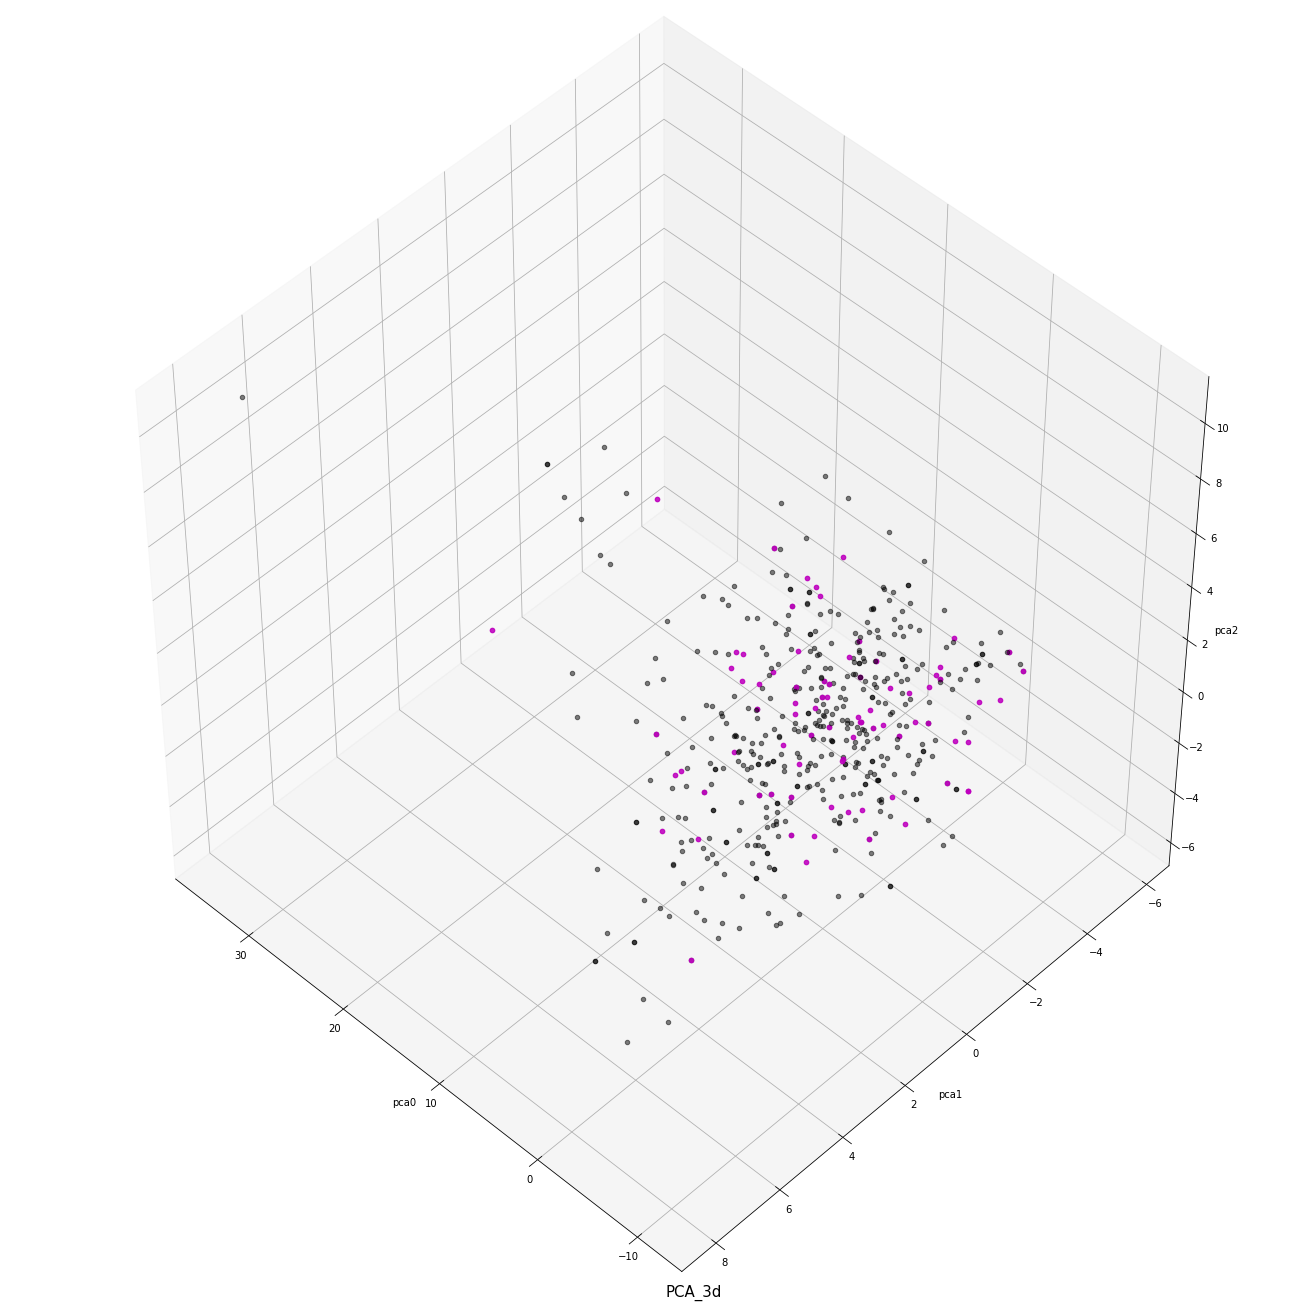

In [64]:
number = [0,1,1,1,1,1,1,0,0,0]
# number = [1,0,0,0,0,0,0,0,0,0]

pca(data_total,"total",number, 0,"3d")

In [65]:
def tsne(data, gender, target, gender_color,dimension):
  if ( gender == 'M'):
    data = data_total[data_total["Gender"]=="M"].copy()
  elif (gender == 'F'):
    data = data_total[data_total["Gender"]=="F"].copy()
  elif (gender == 'total'):
    data_M = data_total[data_total["Gender"]=="M"].copy()
    data_M["Gender_F"] = 0
    data_F = data_total[data_total["Gender"]=="F"].copy()
    data_F["Gender_F"] = 1

    data = pd.concat([data_M, data_F],axis=0)

    data_gender = data["Gender_F"]
    data_gender = np.array(data_gender)
    
    data = data.drop(columns=["Gender_F"])


  data = data.drop(columns=["Gender"])
  # target table
  target = data[["class", "Diagnosis_1",	"Diagnosis_2",	"Diagnosis_3",	"Diagnosis_4",	"Diagnosis_5",	"Diagnosis_6",	"Diagnosis_7",	"Diagnosis_8",	"Diagnosis_9" ]]


  data_class = data["class"]
  data_class = np.array(data_class)

  data_Diagnosis_1 = data["Diagnosis_1"]
  data_Diagnosis_1 = np.array(data_Diagnosis_1)

  data_Diagnosis_2 = data["Diagnosis_2"]
  data_Diagnosis_2 = np.array(data_Diagnosis_2)

  data_Diagnosis_3 = data["Diagnosis_3"]
  data_Diagnosis_3 = np.array(data_Diagnosis_3)

  data_Diagnosis_4 = data["Diagnosis_4"]
  data_Diagnosis_4 = np.array(data_Diagnosis_4)

  data_Diagnosis_5 = data["Diagnosis_5"]
  data_Diagnosis_5 = np.array(data_Diagnosis_5)

  data_Diagnosis_6 = data["Diagnosis_6"]
  data_Diagnosis_6 = np.array(data_Diagnosis_6)

  data_Diagnosis_7 = data["Diagnosis_7"]
  data_Diagnosis_7 = np.array(data_Diagnosis_7)

  data_Diagnosis_8 = data["Diagnosis_8"]
  data_Diagnosis_8 = np.array(data_Diagnosis_8)

  data_Diagnosis_9 = data["Diagnosis_9"]
  data_Diagnosis_9 = np.array(data_Diagnosis_9)

  data = data.drop(columns=["class", "Diagnosis_1",	"Diagnosis_2",	"Diagnosis_3",	"Diagnosis_4",	"Diagnosis_5",	"Diagnosis_6",	"Diagnosis_7",	"Diagnosis_8",	"Diagnosis_9"])

  # npy 변환
  data = np.array(data)
  data_npy = np.array(data)
  target = np.array(target)
  # scaler
  scaler = StandardScaler()
  scaler.fit(data_npy)
  
  y_scaler = scaler.transform(data)

  if dimension == "2d":

    tsne = TSNE(random_state=44)
    # TSNE에는 transform 메소드가 없으므로 대신 fit_transform을 사용합니다
    y_tsne = tsne.fit_transform(y_scaler)

    # df tsne
    tsne_col = ["tsne0", "tsne1"]
    df_y_tsne = pd.DataFrame(y_tsne,columns=tsne_col)


    
    colors = ["b", "r", "g", "m", "k"]

    # 남자 - 파랑, 여자 - 빨강, 안 아픈 사람 - 녹색, 아픈 사람 - 주황, 진단명 - k (흑색)



    plt.figure(figsize=(15, 15))
    plt.xlim(y_tsne[:, 0].min(), y_tsne[:, 0].max() + 1)
    plt.ylim(y_tsne[:, 1].min(), y_tsne[:, 1].max() + 1)


    # color를 남녀를 기준으로 나눔
    if (gender_color == 1):
      if (number[0] == 1 ):
        for i in range(len(y_tsne)):
          plt.text(y_tsne[i, 0], y_tsne[i, 1], str(data_class[i]),
          color = colors[data_gender[i]],
          fontdict={'weight': 'bold', 'size': 9})
      
      else:
        for i in range(1,len(number)):
          if (number[1] == 1):
            for j in range(len(y_tsne)):        
              if data_Diagnosis_1[j] == 1:
                plt.text(y_tsne[j, 0], y_tsne[j, 1], str(data_Diagnosis_1[j]),
                    color = colors[data_gender[j]],
                    fontdict={'weight': 'bold', 'size': 9})         
            number[1]=2
            print('1')
        
          elif (number[2] == 1):
            for j in range(len(y_tsne)):  
              if data_Diagnosis_2[j] == 1:
                plt.text(y_tsne[j, 0], y_tsne[j, 1], str(data_Diagnosis_2[j]+1),
                    color = colors[data_gender[j]],
                    fontdict={'weight': 'bold', 'size': 9})
            number[2]=2
            print('2')


            

          elif (number[3] == 1):
            for j in range(len(y_tsne)):  
              if data_Diagnosis_3[j] == 1:
                plt.text(y_tsne[j, 0], y_tsne[j, 1], str(data_Diagnosis_3[j] + 2),
                color = colors[data_gender[j]],
                fontdict={'weight': 'bold', 'size': 9})
            number[3]=2
            print('3')


          elif (number[4] == 1):
            for j in range(len(y_tsne)):  
              if data_Diagnosis_4[j] == 1:
                plt.text(y_tsne[j, 0], y_tsne[j, 1], str(data_Diagnosis_4[j] + 3),
                color = colors[data_gender[j]],
                fontdict={'weight': 'bold', 'size': 9})
            number[4]=2
            print('4')


          elif (number[5] == 1):
            for j in range(len(y_tsne)):  
              if data_Diagnosis_5[j] == 1:
                plt.text(y_tsne[j, 0], y_tsne[j, 1], str(data_Diagnosis_5[j] + 4),
                color = colors[data_gender[j]],
                fontdict={'weight': 'bold', 'size': 9})
            number[5]=2
            print('5')


          elif (number[6] == 1):
            for j in range(len(y_tsne)):  
              if data_Diagnosis_6[j] == 1:
                plt.text(y_tsne[j, 0], y_tsne[j, 1], str(data_Diagnosis_6[j] + 5),
                color = colors[data_gender[j]],
                fontdict={'weight': 'bold', 'size': 9})
            number[6]=2
            print('6')
            

          elif (number[7] == 1):
            for j in range(len(y_tsne)):
              if data_Diagnosis_7[j] == 1:
                plt.text(y_tsne[j, 0], y_tsne[j, 1], str(data_Diagnosis_7[j] + 6),
                color = colors[data_gender[j]],
                fontdict={'weight': 'bold', 'size': 9})
            number[7]=2
            print('7')


          elif (number[8] == 1):
            for j in range(len(y_tsne)):
              if data_Diagnosis_8[j] == 1:
                plt.text(y_tsne[j, 0], y_tsne[j, 1], str(data_Diagnosis_8[j] + 7),
                color = colors[data_gender[j]],
                fontdict={'weight': 'bold', 'size': 9})
            number[8]=2
            print('8')

          elif (number[9] == 1):
            for j in range(len(y_tsne)):  
              if data_Diagnosis_9[j] == 1:
                plt.text(y_tsne[j, 0], y_tsne[j, 1], str(data_Diagnosis_9[j] + 8),
                color = colors[data_gender[j]],
                fontdict={'weight': 'bold', 'size': 9})
            number[9]=2
            print('9')
          
          else:
            for k in range(1, len(number)):
              if number[k] == 2:
                pass

              elif number[k] == 0:
                for a in range(len(y_tsne)):
                  if target[a,k] == 1:
                    plt.text(y_tsne[a, 0], y_tsne[a, 1], str('0'),
                      color = colors[data_gender[a]],
                      fontdict={'weight': 'bold', 'size': 9})


    # 색깔을 아픈 사람 안 아픈 사람을 기준으로 그리고 질병을 기준으로 나눈다
    else:
      if (number[0] == 1 ):
        for i in range(len(y_tsne)):
          plt.text(y_tsne[i, 0], y_tsne[i, 1], str(data_class[i]),
          color = colors[data_class[i]+2],
          fontdict={'weight': 'bold', 'size': 9})
      
      else:
        for i in range(1,len(number)):
          if (number[1] == 1):
            for j in range(len(y_tsne)):        
              if data_Diagnosis_1[j] == 1:
                plt.text(y_tsne[j, 0], y_tsne[j, 1], str(data_Diagnosis_1[j]),
                    color = colors[data_class[j]+3],
                    fontdict={'weight': 'bold', 'size': 9})         
            number[1]=2
            print('1')
        
          elif (number[2] == 1):
            for j in range(len(y_tsne)):  
              if data_Diagnosis_2[j] == 1:
                plt.text(y_tsne[j, 0], y_tsne[j, 1], str(data_Diagnosis_2[j]+1),
                    color = colors[data_class[j]+3],
                    fontdict={'weight': 'bold', 'size': 9})
            number[2]=2
            print('2')


            

          elif (number[3] == 1):
            for j in range(len(y_tsne)):  
              if data_Diagnosis_3[j] == 1:
                plt.text(y_tsne[j, 0], y_tsne[j, 1], str(data_Diagnosis_3[j] + 2),
                color = colors[data_class[j]+3],
                fontdict={'weight': 'bold', 'size': 9})
            number[3]=2
            print('3')


          elif (number[4] == 1):
            for j in range(len(y_tsne)):  
              if data_Diagnosis_4[j] == 1:
                plt.text(y_tsne[j, 0], y_tsne[j, 1], str(data_Diagnosis_4[j] + 3),
                color = colors[data_class[j]+3],
                fontdict={'weight': 'bold', 'size': 9})
            number[4]=2
            print('4')


          elif (number[5] == 1):
            for j in range(len(y_tsne)):  
              if data_Diagnosis_5[j] == 1:
                plt.text(y_tsne[j, 0], y_tsne[j, 1], str(data_Diagnosis_5[j] + 4),
                color = colors[data_class[j]+3],
                fontdict={'weight': 'bold', 'size': 9})
            number[5]=2
            print('5')


          elif (number[6] == 1):
            for j in range(len(y_tsne)):  
              if data_Diagnosis_6[j] == 1:
                plt.text(y_tsne[j, 0], y_tsne[j, 1], str(data_Diagnosis_6[j] + 5),
                color = colors[data_class[j]+3],
                fontdict={'weight': 'bold', 'size': 9})
            number[6]=2
            print('6')
            

          elif (number[7] == 1):
            for j in range(len(y_tsne)):
              if data_Diagnosis_7[j] == 1:
                plt.text(y_tsne[j, 0], y_tsne[j, 1], str(data_Diagnosis_7[j] + 6),
                color = colors[data_class[j]+3],
                fontdict={'weight': 'bold', 'size': 9})
            number[7]=2
            print('7')


          elif (number[8] == 1):
            for j in range(len(y_tsne)):
              if data_Diagnosis_8[j] == 1:
                plt.text(y_tsne[j, 0], y_tsne[j, 1], str(data_Diagnosis_8[j] + 7),
                color = colors[data_class[j]+3],
                fontdict={'weight': 'bold', 'size': 9})
            number[8]=2
            print('8')

          elif (number[9] == 1):
            for j in range(len(y_tsne)):  
              if data_Diagnosis_9[j] == 1:
                plt.text(y_tsne[j, 0], y_tsne[j, 1], str(data_Diagnosis_9[j] + 8),
                color = colors[data_class[j]+3],
                fontdict={'weight': 'bold', 'size': 9})
            number[9]=2
            print('9')
          
          else:
            for k in range(1, len(number)):
              if number[k] == 2:
                pass

              elif number[k] == 0:
                for a in range(len(y_tsne)):
                  if target[a,k] == 1:
                    plt.text(y_tsne[a, 0], y_tsne[a, 1], str('0'),
                      color = colors[3],
                      fontdict={'weight': 'bold', 'size': 9})





    plt.xlabel("1st PC")
    plt.ylabel("2st PC")
    plt.title("tsne_2d", 
              position=(0.53, 1.0), 
              fontsize=15)## title 위치 변경 
    plt.show()

  elif dimension == "3d":
    tsne = TSNE(random_state=44, n_components=3)
    # TSNE에는 transform 메소드가 없으므로 대신 fit_transform을 사용합니다
    y_tsne = tsne.fit_transform(y_scaler)

    # df tsne
    tsne_col = ["tsne0", "tsne1","tsne2 "]
    df_y_tsne = pd.DataFrame(y_tsne,columns=tsne_col)


  
    colors = ["b", "r", "g", "m", "k"]

    # 남자 - 파랑, 여자 - 빨강, 안 아픈 사람 - 녹색, 아픈 사람 - 주황, 진단명 - k (흑색)



    centers = [[1, 1], [-1, -1], [1, -1]]


    fig = plt.figure( figsize=(6,6))
    ax = Axes3D(fig, rect=[0, 0, 3, 3], elev=48, azim=134)

    
    # color를 남녀를 기준으로 나눔
    if (gender_color == 1):
      
      if (number[0] == 1 ):
        for i in range(len(y_tsne)):
          ax.scatter(y_tsne[i,0],y_tsne[i,1],y_tsne[i,2],color = colors[data_gender[i]],alpha=0.5)

      else:
        for i in range(1,len(number)):
          if (number[1] == 1):
            for j in range(len(y_tsne)):        
              if data_Diagnosis_1[j] == 1:
                ax.scatter(y_tsne[j,0],y_tsne[j,1],y_tsne[j,2],c=colors[data_gender[j]],alpha=0.5)
            number[1]=2
            print('1')
        
          elif (number[2] == 1):
            for j in range(len(y_tsne)):  
              if data_Diagnosis_2[j] == 1:
                ax.scatter(y_tsne[j,0],y_tsne[j,1],y_tsne[j,2],c=colors[data_gender[j]],alpha=0.5)
            number[2]=2
            print('2')


          elif (number[3] == 1):
            for j in range(len(y_tsne)):  
              if data_Diagnosis_3[j] == 1:
                ax.scatter(y_tsne[j,0],y_tsne[j,1],y_tsne[j,2],c=colors[data_gender[j]],alpha=0.5)
            number[3]=2
            print('3')


          elif (number[4] == 1):
            for j in range(len(y_tsne)):  
              if data_Diagnosis_4[j] == 1:
                ax.scatter(y_tsne[j,0],y_tsne[j,1],y_tsne[j,2],c=colors[data_gender[j]],alpha=0.5)
            number[4]=2
            print('4')
          


          elif (number[5] == 1):
            for j in range(len(y_tsne)):  
              if data_Diagnosis_5[j] == 1:
                ax.scatter(y_tsne[j,0],y_tsne[j,1],y_tsne[j,2],c=colors[data_gender[j]],alpha=0.5)
            number[5]=2
            print('5')


          elif (number[6] == 1):
            for j in range(len(y_tsne)):  
              if data_Diagnosis_6[j] == 1:
                ax.scatter(y_tsne[j,0],y_tsne[j,1],y_tsne[j,2],c=colors[data_gender[j]],alpha=0.5)
            number[6]=2
            print('6')
            

          elif (number[7] == 1):
            for j in range(len(y_tsne)):
              if data_Diagnosis_7[j] == 1:
                ax.scatter(y_tsne[j,0],y_tsne[j,1],y_tsne[j,2],c=colors[data_gender[j]],alpha=0.5)
            number[7]=2
            print('7')


          elif (number[8] == 1):
            for j in range(len(y_tsne)):
              if data_Diagnosis_8[j] == 1:
                ax.scatter(y_tsne[j,0],y_tsne[j,1],y_tsne[j,2],c=colors[data_gender[j]],alpha=0.5)
            number[8]=2

            print('8')


          elif (number[9] == 1):
            for j in range(len(y_tsne)):  
              if data_Diagnosis_9[j] == 1:
                ax.scatter(y_tsne[j,0],y_tsne[j,1],y_tsne[j,2],c=colors[data_gender[j]],alpha=0.5)
            number[9]=2
            print('9')

          
          else:
            for k in range(1, len(number)):
              if number[k] == 2:
                pass

              elif number[k] == 0:
                for a in range(len(y_tsne)):
                  if target[a,k] == 1:
                    ax.scatter(y_tsne[a,0],y_tsne[a,1],y_tsne[a,2],c=colors[data_gender[a]],alpha=0.5)

    elif (gender_color == 0):
      
      if (number[0] == 1 ):
        for i in range(len(y_tsne)):
          ax.scatter(y_tsne[i,0],y_tsne[i,1],y_tsne[i,2],color = colors[data_class[i]+2],alpha=0.5)

      else:
        for i in range(1,len(number)):
          if (number[1] == 1):
            for j in range(len(y_tsne)):        
              if data_Diagnosis_1[j] == 1:
                ax.scatter(y_tsne[j,0],y_tsne[j,1],y_tsne[j,2],c=colors[data_class[j]+3],alpha=0.5)
            number[1]=2
            print('1')
        
          elif (number[2] == 1):
            for j in range(len(y_tsne)):  
              if data_Diagnosis_2[j] == 1:
                ax.scatter(y_tsne[j,0],y_tsne[j,1],y_tsne[j,2],c=colors[data_class[j]+3],alpha=0.5)
            number[2]=2
            print('2')


          elif (number[3] == 1):
            for j in range(len(y_tsne)):  
              if data_Diagnosis_3[j] == 1:
                ax.scatter(y_tsne[j,0],y_tsne[j,1],y_tsne[j,2],c=colors[data_class[j]+3],alpha=0.5)
            number[3]=2
            print('3')


          elif (number[4] == 1):
            for j in range(len(y_tsne)):  
              if data_Diagnosis_4[j] == 1:
                ax.scatter(y_tsne[j,0],y_tsne[j,1],y_tsne[j,2],c=colors[data_class[j]+3],alpha=0.5)
            number[4]=2
            print('4')
          


          elif (number[5] == 1):
            for j in range(len(y_tsne)):  
              if data_Diagnosis_5[j] == 1:
                ax.scatter(y_tsne[j,0],y_tsne[j,1],y_tsne[j,2],c=colors[data_class[j]+3],alpha=0.5)
            number[5]=2
            print('5')


          elif (number[6] == 1):
            for j in range(len(y_tsne)):  
              if data_Diagnosis_6[j] == 1:
                ax.scatter(y_tsne[j,0],y_tsne[j,1],y_tsne[j,2],c=colors[data_class[j]+3],alpha=0.5)
            number[6]=2
            print('6')
            

          elif (number[7] == 1):
            for j in range(len(y_tsne)):
              if data_Diagnosis_7[j] == 1:
                ax.scatter(y_tsne[j,0],y_tsne[j,1],y_tsne[j,2],c=colors[data_class[j]+3],alpha=0.5)
            number[7]=2
            print('7')


          elif (number[8] == 1):
            for j in range(len(y_tsne)):
              if data_Diagnosis_8[j] == 1:
                ax.scatter(y_tsne[j,0],y_tsne[j,1],y_tsne[j,2],c=colors[data_class[j]+3],alpha=0.5)
            number[8]=2

            print('8')


          elif (number[9] == 1):
            for j in range(len(y_tsne)):  
              if data_Diagnosis_9[j] == 1:
                ax.scatter(y_tsne[j,0],y_tsne[j,1],y_tsne[j,2],c=colors[data_class[j]+3],alpha=0.5)
            number[9]=2
            print('9')


          
          else:
            for k in range(1, len(number)):
              if number[k] == 2:
                pass

              elif number[k] == 0:
                for a in range(len(y_tsne)):
                  if target[a,k] == 1:
                    ax.scatter(y_tsne[a,0],y_tsne[a,1],y_tsne[a,2],c=colors[3],alpha=0.5)
            

    ax.set_xlabel(tsne_col[0])
    ax.set_ylabel(tsne_col[1])
    ax.set_zlabel(tsne_col[2])
    plt.title("tsne_3d", 
              position=(0.53, 1.0-1.0), 
              fontsize=15)## title 위치 변경 
    plt.show()


1
2
3
4
5


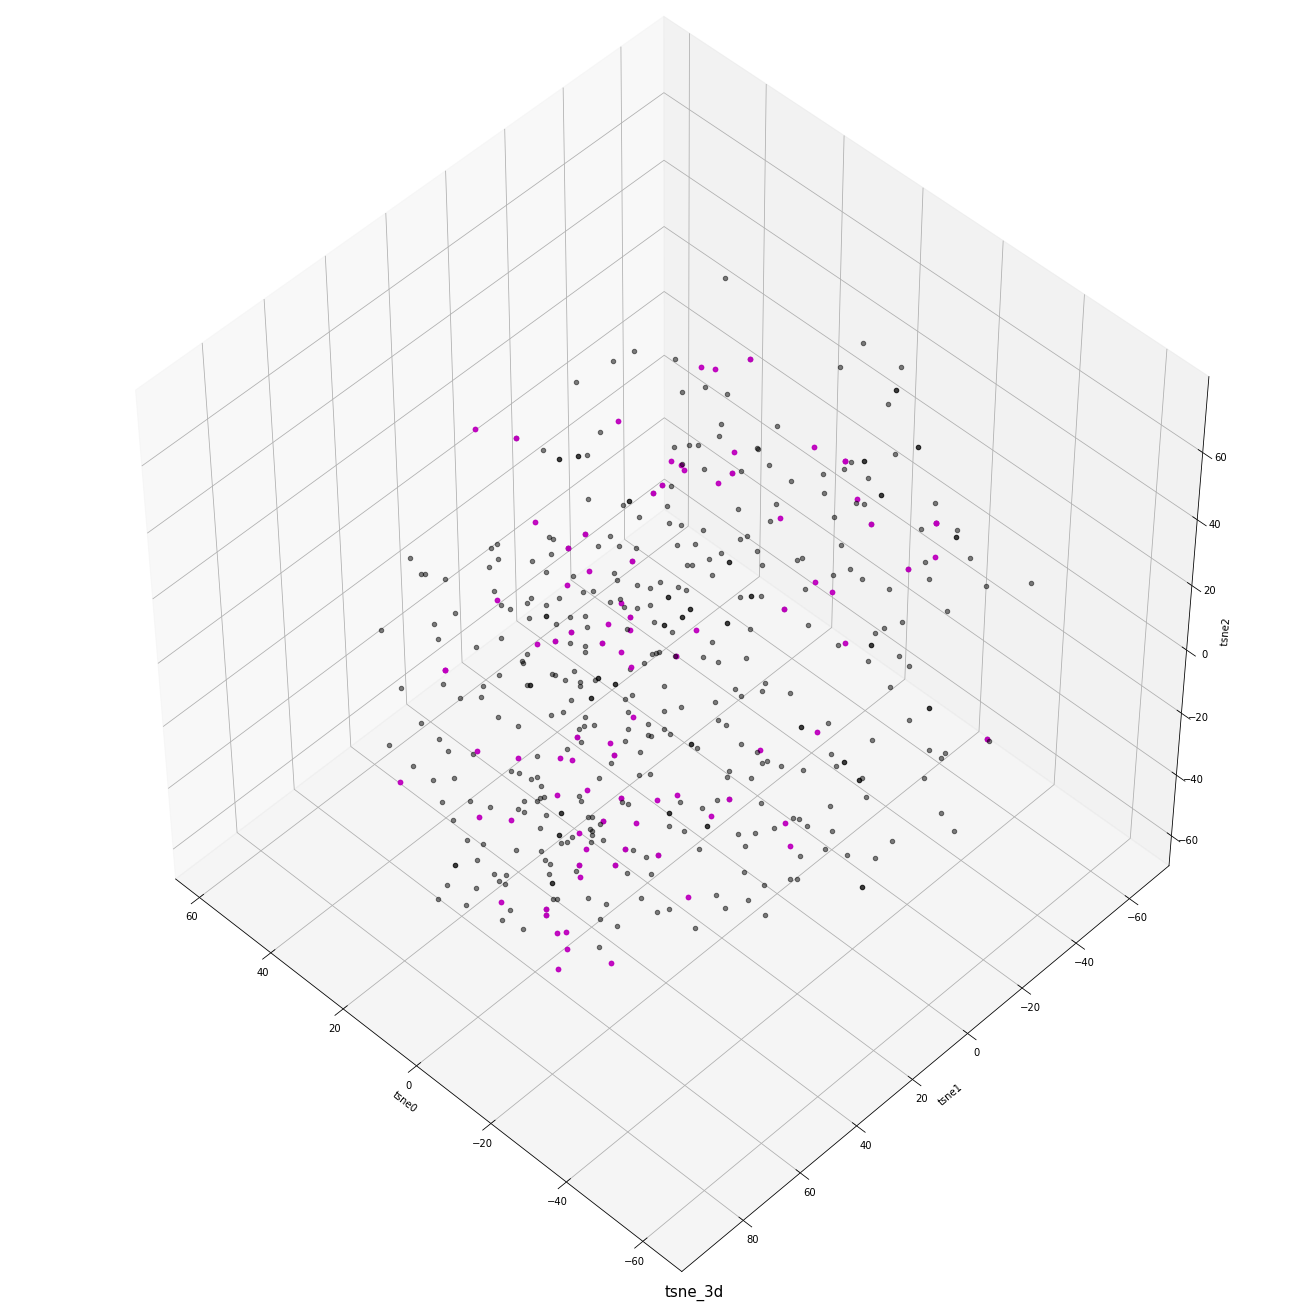

In [66]:
# number = [1,0,0,0,0,0,0,0,0,0]
number = [0,1,1,1,1,1,0,0,0,0]

tsne(data_total,"total",number, 0,"3d")

In [67]:
def autuoencoder(data, gender, target, gender_color,dimension):
  if ( gender == 'M'):
    data = data_total[data_total["Gender"]=="M"].copy()
  elif (gender == 'F'):
    data = data_total[data_total["Gender"]=="F"].copy()
  elif (gender == 'total'):
    data_M = data_total[data_total["Gender"]=="M"].copy()
    data_M["Gender_F"] = 0
    data_F = data_total[data_total["Gender"]=="F"].copy()
    data_F["Gender_F"] = 1

    data = pd.concat([data_M, data_F],axis=0)

    data_gender = data["Gender_F"]
    data_gender = np.array(data_gender)
    
    data = data.drop(columns=["Gender_F"])


  data = data.drop(columns=["Gender"])
  # target table
  target = data[["class", "Diagnosis_1",	"Diagnosis_2",	"Diagnosis_3",	"Diagnosis_4",	"Diagnosis_5",	"Diagnosis_6",	"Diagnosis_7",	"Diagnosis_8",	"Diagnosis_9" ]]


  data_class = data["class"]
  data_class = np.array(data_class)

  data_Diagnosis_1 = data["Diagnosis_1"]
  data_Diagnosis_1 = np.array(data_Diagnosis_1)

  data_Diagnosis_2 = data["Diagnosis_2"]
  data_Diagnosis_2 = np.array(data_Diagnosis_2)

  data_Diagnosis_3 = data["Diagnosis_3"]
  data_Diagnosis_3 = np.array(data_Diagnosis_3)

  data_Diagnosis_4 = data["Diagnosis_4"]
  data_Diagnosis_4 = np.array(data_Diagnosis_4)

  data_Diagnosis_5 = data["Diagnosis_5"]
  data_Diagnosis_5 = np.array(data_Diagnosis_5)

  data_Diagnosis_6 = data["Diagnosis_6"]
  data_Diagnosis_6 = np.array(data_Diagnosis_6)

  data_Diagnosis_7 = data["Diagnosis_7"]
  data_Diagnosis_7 = np.array(data_Diagnosis_7)

  data_Diagnosis_8 = data["Diagnosis_8"]
  data_Diagnosis_8 = np.array(data_Diagnosis_8)

  data_Diagnosis_9 = data["Diagnosis_9"]
  data_Diagnosis_9 = np.array(data_Diagnosis_9)

  data = data.drop(columns=["class", "Diagnosis_1",	"Diagnosis_2",	"Diagnosis_3",	"Diagnosis_4",	"Diagnosis_5",	"Diagnosis_6",	"Diagnosis_7",	"Diagnosis_8",	"Diagnosis_9"])

  # npy 변환
  data = np.array(data)
  data_npy = np.array(data)
  target = np.array(target)
  # scaler
  scaler = StandardScaler()
  scaler.fit(data_npy)
  
  y_scaler = scaler.transform(data)

  x_data = np.array(y_scaler)
  data_length = len(x_data[0])

  if dimension == "2d":
      
    input_shape = (data_length, )
    batch_size = 1
    latent_dim = 2
    encoder_input = Input(shape=input_shape, name='encoder_input')
    e1 = Dense(1024, activation='relu')(encoder_input)
    e2 = Dense(1024, activation='relu')(e1)
    latent = Dense(latent_dim, name='latent_vector')(e2)
    encoder = Model(encoder_input, latent, name='encoder')
    encoder.summary()
    latent_input = Input(shape=(latent_dim,), name='decoder_input')
    d1 = Dense(1024, activation='relu')(latent_input)
    d2 = Dense(1024, activation='relu')(d1)
    decoder_output = Dense(data_length, name='decoder_output')(d2)
    decoder = Model(latent_input, decoder_output, name='decoder_output')
    decoder.summary()
    autoencoder = Model(encoder_input, decoder(encoder(encoder_input)), name='autoencoder')
    autoencoder.summary()

    autoencoder.compile(loss='mse', optimizer='adam')
    autoencoder.fit(x_data, x_data,
                    epochs = 10,
                    batch_size=batch_size,
                    shuffle=True)
    x_latent = encoder.predict(x_data)


    
    colors = ["b", "r", "g", "m", "k"]

    # 남자 - 파랑, 여자 - 빨강, 안 아픈 사람 - 녹색, 아픈 사람 - 주황, 진단명 - k (흑색)



    plt.figure(figsize=(15, 15))
    plt.xlim(x_latent[:, 0].min(), x_latent[:, 0].max() + 1)
    plt.ylim(x_latent[:, 1].min(), x_latent[:, 1].max() + 1)


    # color를 남녀를 기준으로 나눔
    if (gender_color == 1):
      if (number[0] == 1 ):
        for i in range(len(x_latent)):
          plt.text(x_latent[i, 0], x_latent[i, 1], str(data_class[i]),
          color = colors[data_gender[i]],
          fontdict={'weight': 'bold', 'size': 9})
      
      else:
        for i in range(1,len(number)):
          if (number[1] == 1):
            for j in range(len(x_latent)):        
              if data_Diagnosis_1[j] == 1:
                plt.text(x_latent[j, 0], x_latent[j, 1], str(data_Diagnosis_1[j]),
                    color = colors[data_gender[j]],
                    fontdict={'weight': 'bold', 'size': 9})         
            number[1]=2
            print('1')
        
          elif (number[2] == 1):
            for j in range(len(x_latent)):  
              if data_Diagnosis_2[j] == 1:
                plt.text(x_latent[j, 0], x_latent[j, 1], str(data_Diagnosis_2[j]+1),
                    color = colors[data_gender[j]],
                    fontdict={'weight': 'bold', 'size': 9})
            number[2]=2
            print('2')


            

          elif (number[3] == 1):
            for j in range(len(x_latent)):  
              if data_Diagnosis_3[j] == 1:
                plt.text(x_latent[j, 0], x_latent[j, 1], str(data_Diagnosis_3[j] + 2),
                color = colors[data_gender[j]],
                fontdict={'weight': 'bold', 'size': 9})
            number[3]=2
            print('3')


          elif (number[4] == 1):
            for j in range(len(x_latent)):  
              if data_Diagnosis_4[j] == 1:
                plt.text(x_latent[j, 0], x_latent[j, 1], str(data_Diagnosis_4[j] + 3),
                color = colors[data_gender[j]],
                fontdict={'weight': 'bold', 'size': 9})
            number[4]=2
            print('4')


          elif (number[5] == 1):
            for j in range(len(x_latent)):  
              if data_Diagnosis_5[j] == 1:
                plt.text(x_latent[j, 0], x_latent[j, 1], str(data_Diagnosis_5[j] + 4),
                color = colors[data_gender[j]],
                fontdict={'weight': 'bold', 'size': 9})
            number[5]=2
            print('5')


          elif (number[6] == 1):
            for j in range(len(x_latent)):  
              if data_Diagnosis_6[j] == 1:
                plt.text(x_latent[j, 0], x_latent[j, 1], str(data_Diagnosis_6[j] + 5),
                color = colors[data_gender[j]],
                fontdict={'weight': 'bold', 'size': 9})
            number[6]=2
            print('6')
            

          elif (number[7] == 1):
            for j in range(len(x_latent)):
              if data_Diagnosis_7[j] == 1:
                plt.text(x_latent[j, 0], x_latent[j, 1], str(data_Diagnosis_7[j] + 6),
                color = colors[data_gender[j]],
                fontdict={'weight': 'bold', 'size': 9})
            number[7]=2
            print('7')


          elif (number[8] == 1):
            for j in range(len(x_latent)):
              if data_Diagnosis_8[j] == 1:
                plt.text(x_latent[j, 0], x_latent[j, 1], str(data_Diagnosis_8[j] + 7),
                color = colors[data_gender[j]],
                fontdict={'weight': 'bold', 'size': 9})
            number[8]=2
            print('8')

          elif (number[9] == 1):
            for j in range(len(x_latent)):  
              if data_Diagnosis_9[j] == 1:
                plt.text(x_latent[j, 0], x_latent[j, 1], str(data_Diagnosis_9[j] + 8),
                color = colors[data_gender[j]],
                fontdict={'weight': 'bold', 'size': 9})
            number[9]=2
            print('9')
          
          else:
            for k in range(1, len(number)):
              if number[k] == 2:
                pass

              elif number[k] == 0:
                for a in range(len(x_latent)):
                  if target[a,k] == 1:
                    plt.text(x_latent[a, 0], x_latent[a, 1], str('0'),
                      color = colors[data_gender[a]],
                      fontdict={'weight': 'bold', 'size': 9})


    # 색깔을 아픈 사람 안 아픈 사람을 기준으로 그리고 질병을 기준으로 나눈다
    else:
      if (number[0] == 1 ):
        for i in range(len(x_latent)):
          plt.text(x_latent[i, 0], x_latent[i, 1], str(data_class[i]),
          color = colors[data_class[i]+2],
          fontdict={'weight': 'bold', 'size': 9})
      
      else:
        for i in range(1,len(number)):
          if (number[1] == 1):
            for j in range(len(x_latent)):        
              if data_Diagnosis_1[j] == 1:
                plt.text(x_latent[j, 0], x_latent[j, 1], str(data_Diagnosis_1[j]),
                    color = colors[data_class[j]+3],
                    fontdict={'weight': 'bold', 'size': 9})         
            number[1]=2
            print('1')
        
          elif (number[2] == 1):
            for j in range(len(x_latent)):  
              if data_Diagnosis_2[j] == 1:
                plt.text(x_latent[j, 0], x_latent[j, 1], str(data_Diagnosis_2[j]+1),
                    color = colors[data_class[j]+3],
                    fontdict={'weight': 'bold', 'size': 9})
            number[2]=2
            print('2')


            

          elif (number[3] == 1):
            for j in range(len(x_latent)):  
              if data_Diagnosis_3[j] == 1:
                plt.text(x_latent[j, 0], x_latent[j, 1], str(data_Diagnosis_3[j] + 2),
                color = colors[data_class[j]+3],
                fontdict={'weight': 'bold', 'size': 9})
            number[3]=2
            print('3')


          elif (number[4] == 1):
            for j in range(len(x_latent)):  
              if data_Diagnosis_4[j] == 1:
                plt.text(x_latent[j, 0], x_latent[j, 1], str(data_Diagnosis_4[j] + 3),
                color = colors[data_class[j]+3],
                fontdict={'weight': 'bold', 'size': 9})
            number[4]=2
            print('4')


          elif (number[5] == 1):
            for j in range(len(x_latent)):  
              if data_Diagnosis_5[j] == 1:
                plt.text(x_latent[j, 0], x_latent[j, 1], str(data_Diagnosis_5[j] + 4),
                color = colors[data_class[j]+3],
                fontdict={'weight': 'bold', 'size': 9})
            number[5]=2
            print('5')


          elif (number[6] == 1):
            for j in range(len(x_latent)):  
              if data_Diagnosis_6[j] == 1:
                plt.text(x_latent[j, 0], x_latent[j, 1], str(data_Diagnosis_6[j] + 5),
                color = colors[data_class[j]+3],
                fontdict={'weight': 'bold', 'size': 9})
            number[6]=2
            print('6')
            

          elif (number[7] == 1):
            for j in range(len(x_latent)):
              if data_Diagnosis_7[j] == 1:
                plt.text(x_latent[j, 0], x_latent[j, 1], str(data_Diagnosis_7[j] + 6),
                color = colors[data_class[j]+3],
                fontdict={'weight': 'bold', 'size': 9})
            number[7]=2
            print('7')


          elif (number[8] == 1):
            for j in range(len(x_latent)):
              if data_Diagnosis_8[j] == 1:
                plt.text(x_latent[j, 0], x_latent[j, 1], str(data_Diagnosis_8[j] + 7),
                color = colors[data_class[j]+3],
                fontdict={'weight': 'bold', 'size': 9})
            number[8]=2
            print('8')

          elif (number[9] == 1):
            for j in range(len(x_latent)):  
              if data_Diagnosis_9[j] == 1:
                plt.text(x_latent[j, 0], x_latent[j, 1], str(data_Diagnosis_9[j] + 8),
                color = colors[data_class[j]+3],
                fontdict={'weight': 'bold', 'size': 9})
            number[9]=2
            print('9')
          
          else:
            for k in range(1, len(number)):
              if number[k] == 2:
                pass

              elif number[k] == 0:
                for a in range(len(x_latent)):
                  if target[a,k] == 1:
                    plt.text(x_latent[a, 0], x_latent[a, 1], str('0'),
                      color = colors[3],
                      fontdict={'weight': 'bold', 'size': 9})





    plt.xlabel("1st encoder")
    plt.ylabel("2st encoder")
    plt.title("autoencoder_2d", 
              position=(0.53, 1.0), 
              fontsize=15)## title 위치 변경 
    plt.show() 


  elif dimension == "3d":
    input_shape = (data_length, )
    batch_size = 1
    latent_dim = 3
    encoder_input = Input(shape=input_shape, name='encoder_input')
    e1 = Dense(1024, activation='relu')(encoder_input)
    e2 = Dense(1024, activation='relu')(e1)
    latent = Dense(latent_dim, name='latent_vector')(e2)
    encoder = Model(encoder_input, latent, name='encoder')
    encoder.summary()
    latent_input = Input(shape=(latent_dim,), name='decoder_input')
    d1 = Dense(1024, activation='relu')(latent_input)
    d2 = Dense(1024, activation='relu')(d1)
    decoder_output = Dense(data_length, name='decoder_output')(d2)
    decoder = Model(latent_input, decoder_output, name='decoder_output')
    decoder.summary()
    autoencoder = Model(encoder_input, decoder(encoder(encoder_input)), name='autoencoder')
    autoencoder.summary()

    autoencoder.compile(loss='mse', optimizer='adam')
    autoencoder.fit(x_data, x_data,
                    epochs = 10,
                    batch_size=batch_size,
                    shuffle=True)
    x_latent = encoder.predict(x_data)

  
    colors = ["b", "r", "g", "m", "k"]

    # 남자 - 파랑, 여자 - 빨강, 안 아픈 사람 - 녹색, 아픈 사람 - 주황, 진단명 - k (흑색)

    encoder_col = ["encoder0", "encoder1","encoder2"]


    centers = [[1, 1], [-1, -1], [1, -1]]


    fig = plt.figure( figsize=(6,6))
    ax = Axes3D(fig, rect=[0, 0, 3, 3], elev=48, azim=134)

    
    # color를 남녀를 기준으로 나눔
    if (gender_color == 1):
      
      if (number[0] == 1 ):
        for i in range(len(x_latent)):
          ax.scatter(x_latent[i,0],x_latent[i,1],x_latent[i,2],color = colors[data_gender[i]],alpha=0.5)

      else:
        for i in range(1,len(number)):
          if (number[1] == 1):
            for j in range(len(x_latent)):        
              if data_Diagnosis_1[j] == 1:
                ax.scatter(x_latent[j,0],x_latent[j,1],x_latent[j,2],c=colors[data_gender[j]],alpha=0.5)
            number[1]=2
            print('1')
        
          elif (number[2] == 1):
            for j in range(len(x_latent)):  
              if data_Diagnosis_2[j] == 1:
                ax.scatter(x_latent[j,0],x_latent[j,1],x_latent[j,2],c=colors[data_gender[j]],alpha=0.5)
            number[2]=2
            print('2')


          elif (number[3] == 1):
            for j in range(len(x_latent)):  
              if data_Diagnosis_3[j] == 1:
                ax.scatter(x_latent[j,0],x_latent[j,1],x_latent[j,2],c=colors[data_gender[j]],alpha=0.5)
            number[3]=2
            print('3')


          elif (number[4] == 1):
            for j in range(len(x_latent)):  
              if data_Diagnosis_4[j] == 1:
                ax.scatter(x_latent[j,0],x_latent[j,1],x_latent[j,2],c=colors[data_gender[j]],alpha=0.5)
            number[4]=2
            print('4')
          


          elif (number[5] == 1):
            for j in range(len(x_latent)):  
              if data_Diagnosis_5[j] == 1:
                ax.scatter(x_latent[j,0],x_latent[j,1],x_latent[j,2],c=colors[data_gender[j]],alpha=0.5)
            number[5]=2
            print('5')


          elif (number[6] == 1):
            for j in range(len(x_latent)):  
              if data_Diagnosis_6[j] == 1:
                ax.scatter(x_latent[j,0],x_latent[j,1],x_latent[j,2],c=colors[data_gender[j]],alpha=0.5)
            number[6]=2
            print('6')
            

          elif (number[7] == 1):
            for j in range(len(x_latent)):
              if data_Diagnosis_7[j] == 1:
                ax.scatter(x_latent[j,0],x_latent[j,1],x_latent[j,2],c=colors[data_gender[j]],alpha=0.5)
            number[7]=2
            print('7')


          elif (number[8] == 1):
            for j in range(len(x_latent)):
              if data_Diagnosis_8[j] == 1:
                ax.scatter(x_latent[j,0],x_latent[j,1],x_latent[j,2],c=colors[data_gender[j]],alpha=0.5)
            number[8]=2

            print('8')


          elif (number[9] == 1):
            for j in range(len(x_latent)):  
              if data_Diagnosis_9[j] == 1:
                ax.scatter(x_latent[j,0],x_latent[j,1],x_latent[j,2],c=colors[data_gender[j]],alpha=0.5)
            number[9]=2
            print('9')

          
          else:
            for k in range(1, len(number)):
              if number[k] == 2:
                pass

              elif number[k] == 0:
                for a in range(len(x_latent)):
                  if target[a,k] == 1:
                    ax.scatter(x_latent[a,0],x_latent[a,1],x_latent[a,2],c=colors[data_gender[a]],alpha=0.5)

    elif (gender_color == 0):
      
      if (number[0] == 1 ):
        for i in range(len(x_latent)):
          ax.scatter(x_latent[i,0],x_latent[i,1],x_latent[i,2],color = colors[data_class[i]+2],alpha=0.5)

      else:
        for i in range(1,len(number)):
          if (number[1] == 1):
            for j in range(len(x_latent)):        
              if data_Diagnosis_1[j] == 1:
                ax.scatter(x_latent[j,0],x_latent[j,1],x_latent[j,2],c=colors[data_class[j]+3],alpha=0.5)
            number[1]=2
            print('1')
        
          elif (number[2] == 1):
            for j in range(len(x_latent)):  
              if data_Diagnosis_2[j] == 1:
                ax.scatter(x_latent[j,0],x_latent[j,1],x_latent[j,2],c=colors[data_class[j]+3],alpha=0.5)
            number[2]=2
            print('2')


          elif (number[3] == 1):
            for j in range(len(x_latent)):  
              if data_Diagnosis_3[j] == 1:
                ax.scatter(x_latent[j,0],x_latent[j,1],x_latent[j,2],c=colors[data_class[j]+3],alpha=0.5)
            number[3]=2
            print('3')


          elif (number[4] == 1):
            for j in range(len(x_latent)):  
              if data_Diagnosis_4[j] == 1:
                ax.scatter(x_latent[j,0],x_latent[j,1],x_latent[j,2],c=colors[data_class[j]+3],alpha=0.5)
            number[4]=2
            print('4')
          


          elif (number[5] == 1):
            for j in range(len(x_latent)):  
              if data_Diagnosis_5[j] == 1:
                ax.scatter(x_latent[j,0],x_latent[j,1],x_latent[j,2],c=colors[data_class[j]+3],alpha=0.5)
            number[5]=2
            print('5')


          elif (number[6] == 1):
            for j in range(len(x_latent)):  
              if data_Diagnosis_6[j] == 1:
                ax.scatter(x_latent[j,0],x_latent[j,1],x_latent[j,2],c=colors[data_class[j]+3],alpha=0.5)
            number[6]=2
            print('6')
            

          elif (number[7] == 1):
            for j in range(len(x_latent)):
              if data_Diagnosis_7[j] == 1:
                ax.scatter(x_latent[j,0],x_latent[j,1],x_latent[j,2],c=colors[data_class[j]+3],alpha=0.5)
            number[7]=2
            print('7')


          elif (number[8] == 1):
            for j in range(len(x_latent)):
              if data_Diagnosis_8[j] == 1:
                ax.scatter(x_latent[j,0],x_latent[j,1],x_latent[j,2],c=colors[data_class[j]+3],alpha=0.5)
            number[8]=2

            print('8')


          elif (number[9] == 1):
            for j in range(len(x_latent)):  
              if data_Diagnosis_9[j] == 1:
                ax.scatter(x_latent[j,0],x_latent[j,1],x_latent[j,2],c=colors[data_class[j]+3],alpha=0.5)
            number[9]=2
            print('9')


          
          else:
            for k in range(1, len(number)):
              if number[k] == 2:
                pass

              elif number[k] == 0:
                for a in range(len(x_latent)):
                  if target[a,k] == 1:
                    ax.scatter(x_latent[a,0],x_latent[a,1],x_latent[a,2],c=colors[3],alpha=0.5)
            

    ax.set_xlabel(encoder_col[0])
    ax.set_ylabel(encoder_col[1])
    ax.set_zlabel(encoder_col[2])
    plt.title("tsne_3d", 
              position=(0.53, 1.0-1.0), 
              fontsize=15)## title 위치 변경 
    plt.show()



Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 62)]              0         
_________________________________________________________________
dense_28 (Dense)             (None, 1024)              64512     
_________________________________________________________________
dense_29 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
latent_vector (Dense)        (None, 3)                 3075      
Total params: 1,117,187
Trainable params: 1,117,187
Non-trainable params: 0
_________________________________________________________________
Model: "decoder_output"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 3)]               0         
_________________________

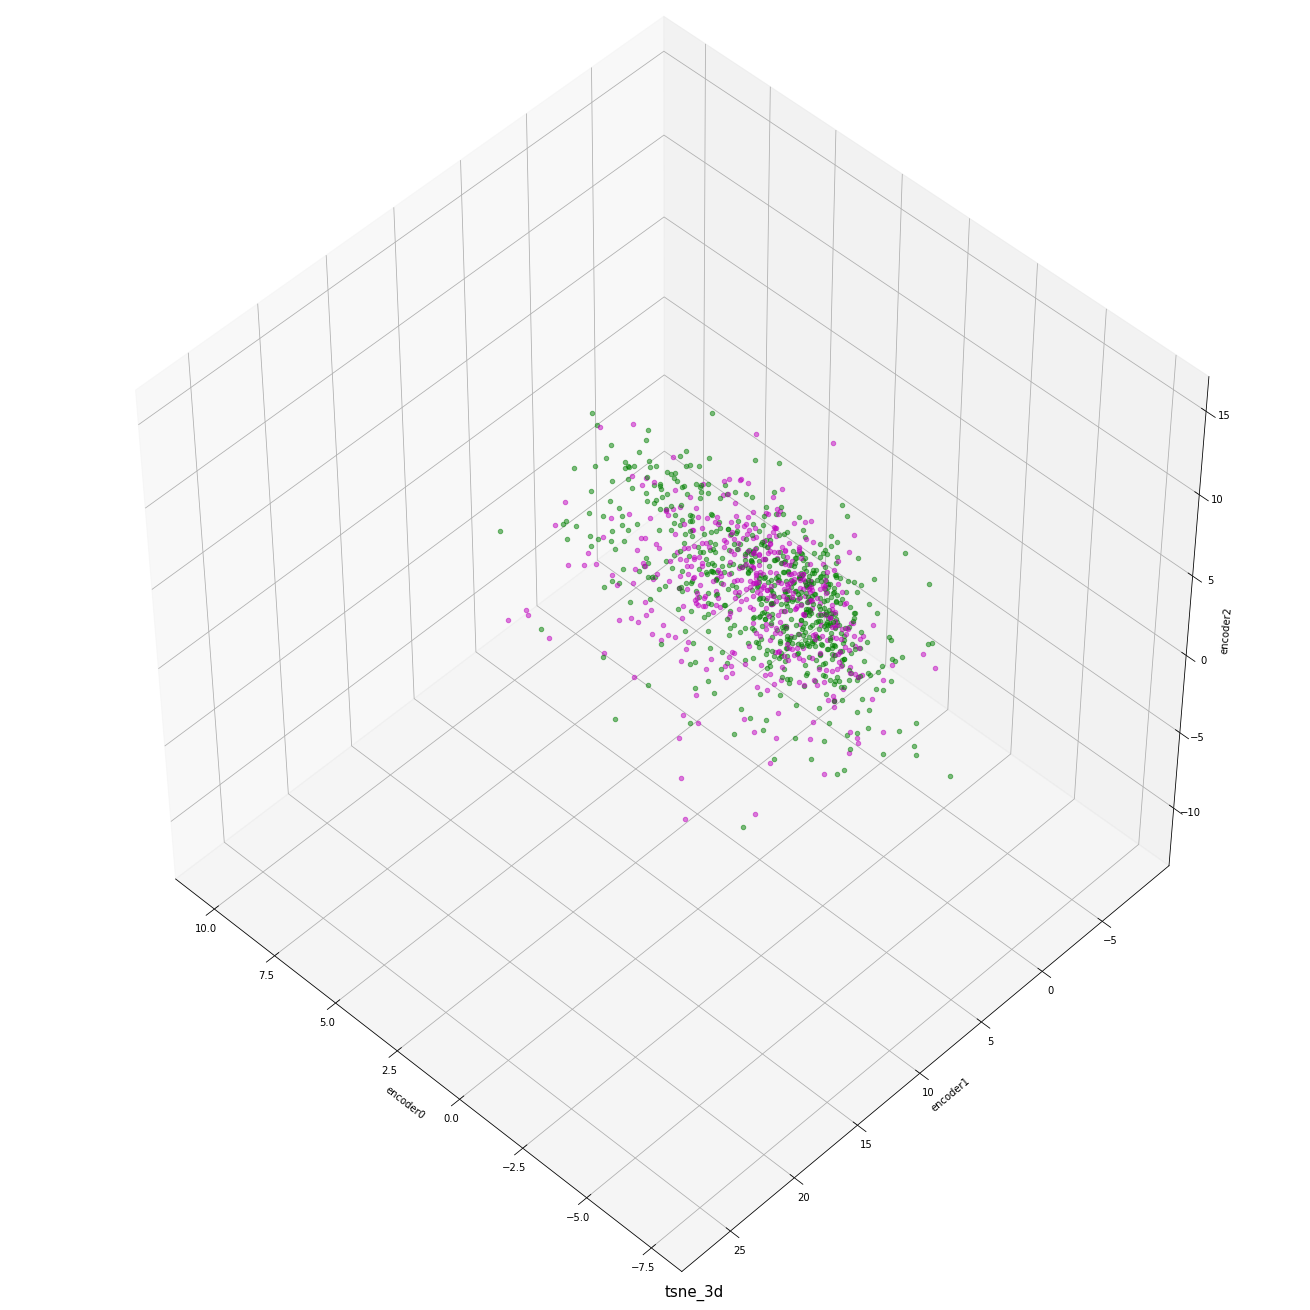

In [68]:
# number = [0,1,1,1,1,1,1,1,1,1]
number = [1,0,0,0,0,0,0,0,0,0]

autuoencoder(data_total,"total",number, 0, "3d")

In [ ]:
def plot(data, gender, target, type, gender_color,dimension):
  if type == "pca":
    pca(data = data, gender = gender, target = target, gender_color=gender_color, dimension = dimension)
  elif type == "tsne":
    tsne(data = data, gender = gender, target = target, gender_color=gender_color, dimension = dimension)
  elif type == "autoencoder":
    autuoencoder(data = data, gender = gender, target = target, gender_color=gender_color, dimension = dimension)




1
2
3
4
5
6


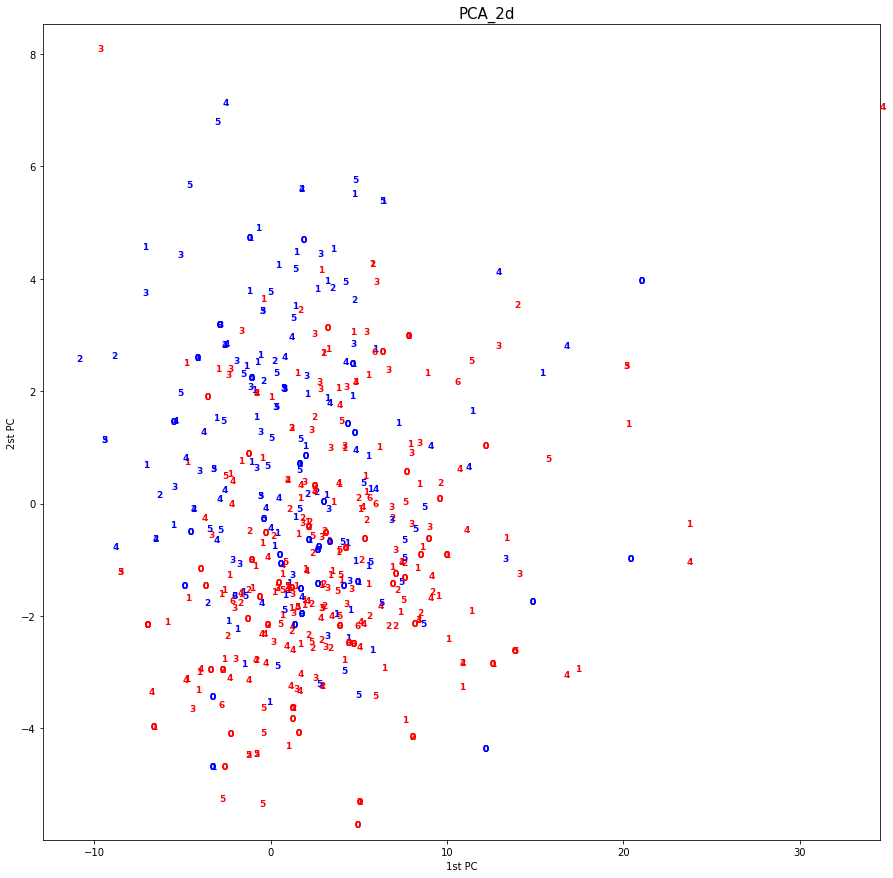

In [69]:
number = [0,1,1,1,1,1,1,0,0,0]
plot(data_total,"total",number, "pca", 1,"2d")

1
2
3
4
5
6


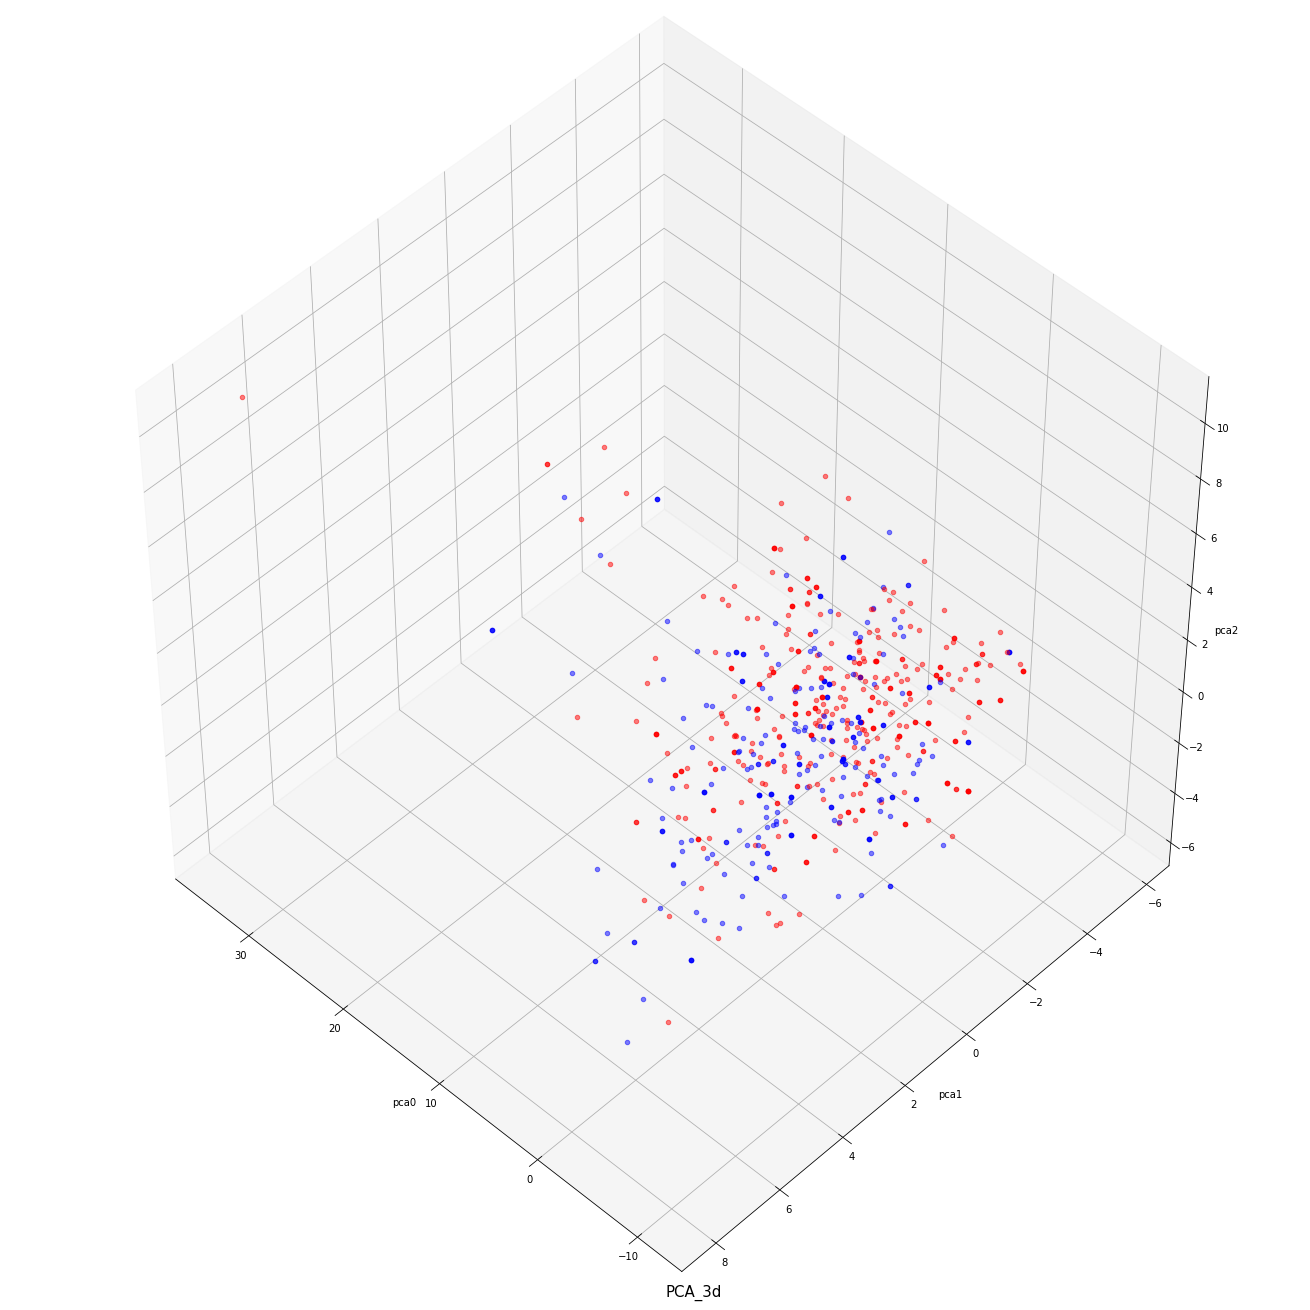

In [70]:
number = [0,1,1,1,1,1,1,0,0,0]
plot(data_total,"total",number, "pca", 1,"3d")

1
2
3
4
5
6


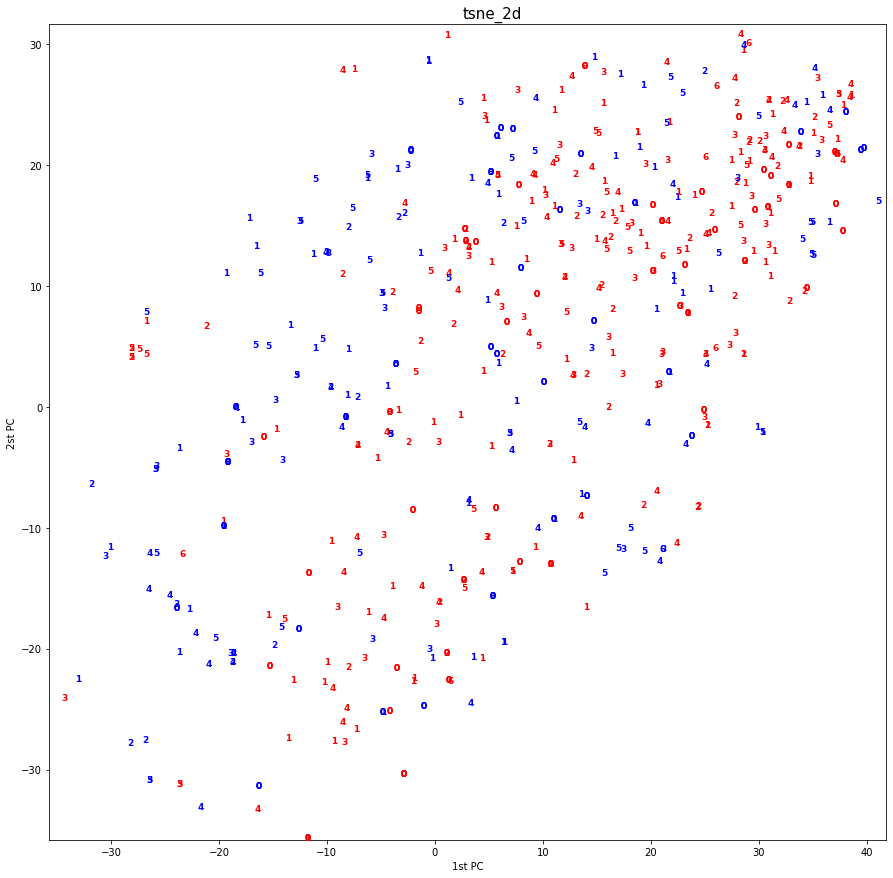

In [71]:
number = [0,1,1,1,1,1,1,0,0,0]
plot(data_total,"total",number, "tsne", 1,"2d")

1
2
3
4
5
6


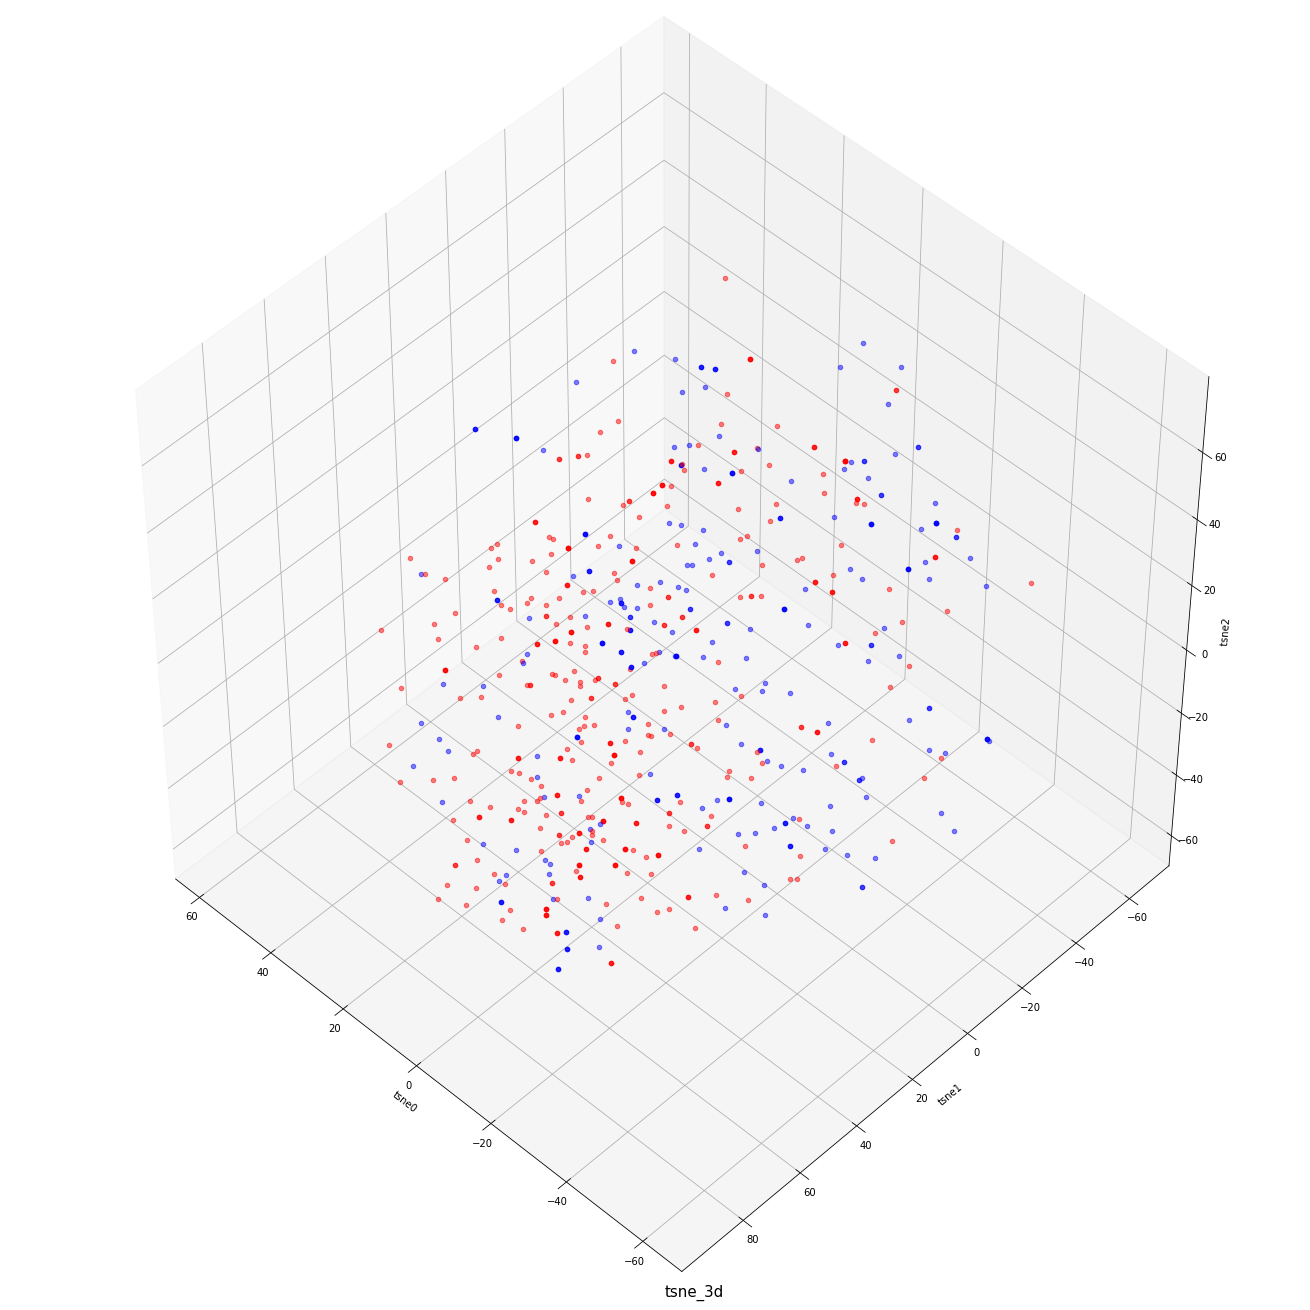

In [72]:
number = [0,1,1,1,1,1,1,0,0,0]
plot(data_total,"total",number, "tsne", 1,"3d")

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 62)]              0         
_________________________________________________________________
dense_32 (Dense)             (None, 1024)              64512     
_________________________________________________________________
dense_33 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
latent_vector (Dense)        (None, 2)                 2050      
Total params: 1,116,162
Trainable params: 1,116,162
Non-trainable params: 0
_________________________________________________________________
Model: "decoder_output"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 2)]               0         
_________________________

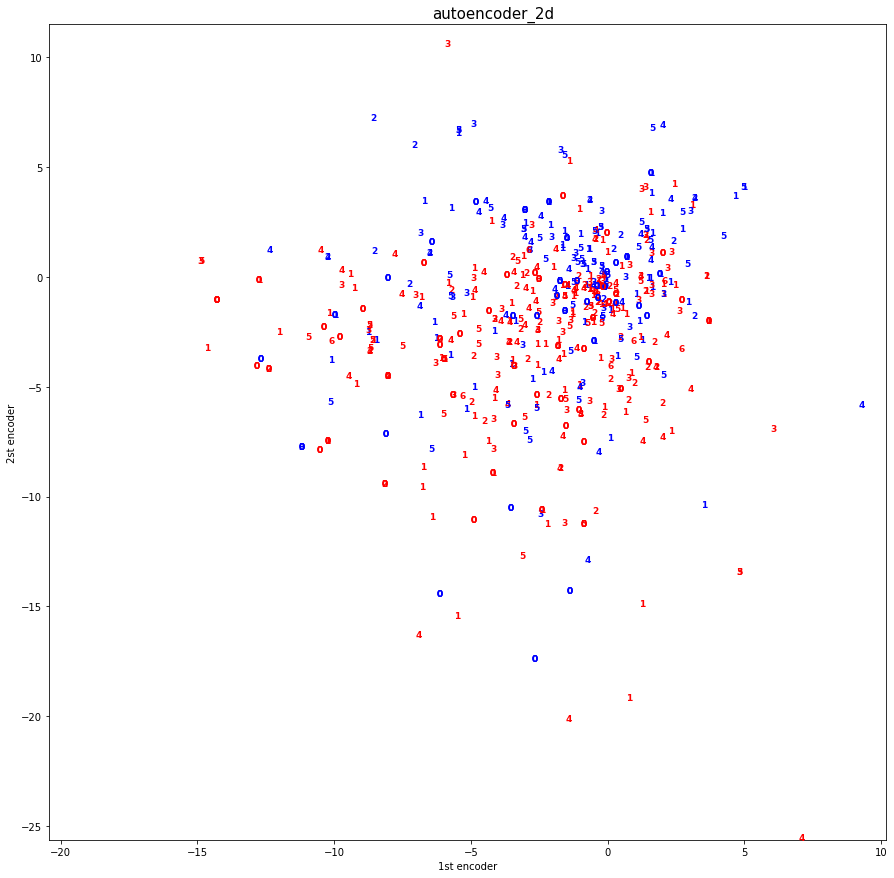

In [73]:
number = [0,1,1,1,1,1,1,0,0,0]
plot(data_total,"total",number, "autoencoder", 1,"2d")

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 62)]              0         
_________________________________________________________________
dense_36 (Dense)             (None, 1024)              64512     
_________________________________________________________________
dense_37 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
latent_vector (Dense)        (None, 3)                 3075      
Total params: 1,117,187
Trainable params: 1,117,187
Non-trainable params: 0
_________________________________________________________________
Model: "decoder_output"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 3)]               0         
_________________________

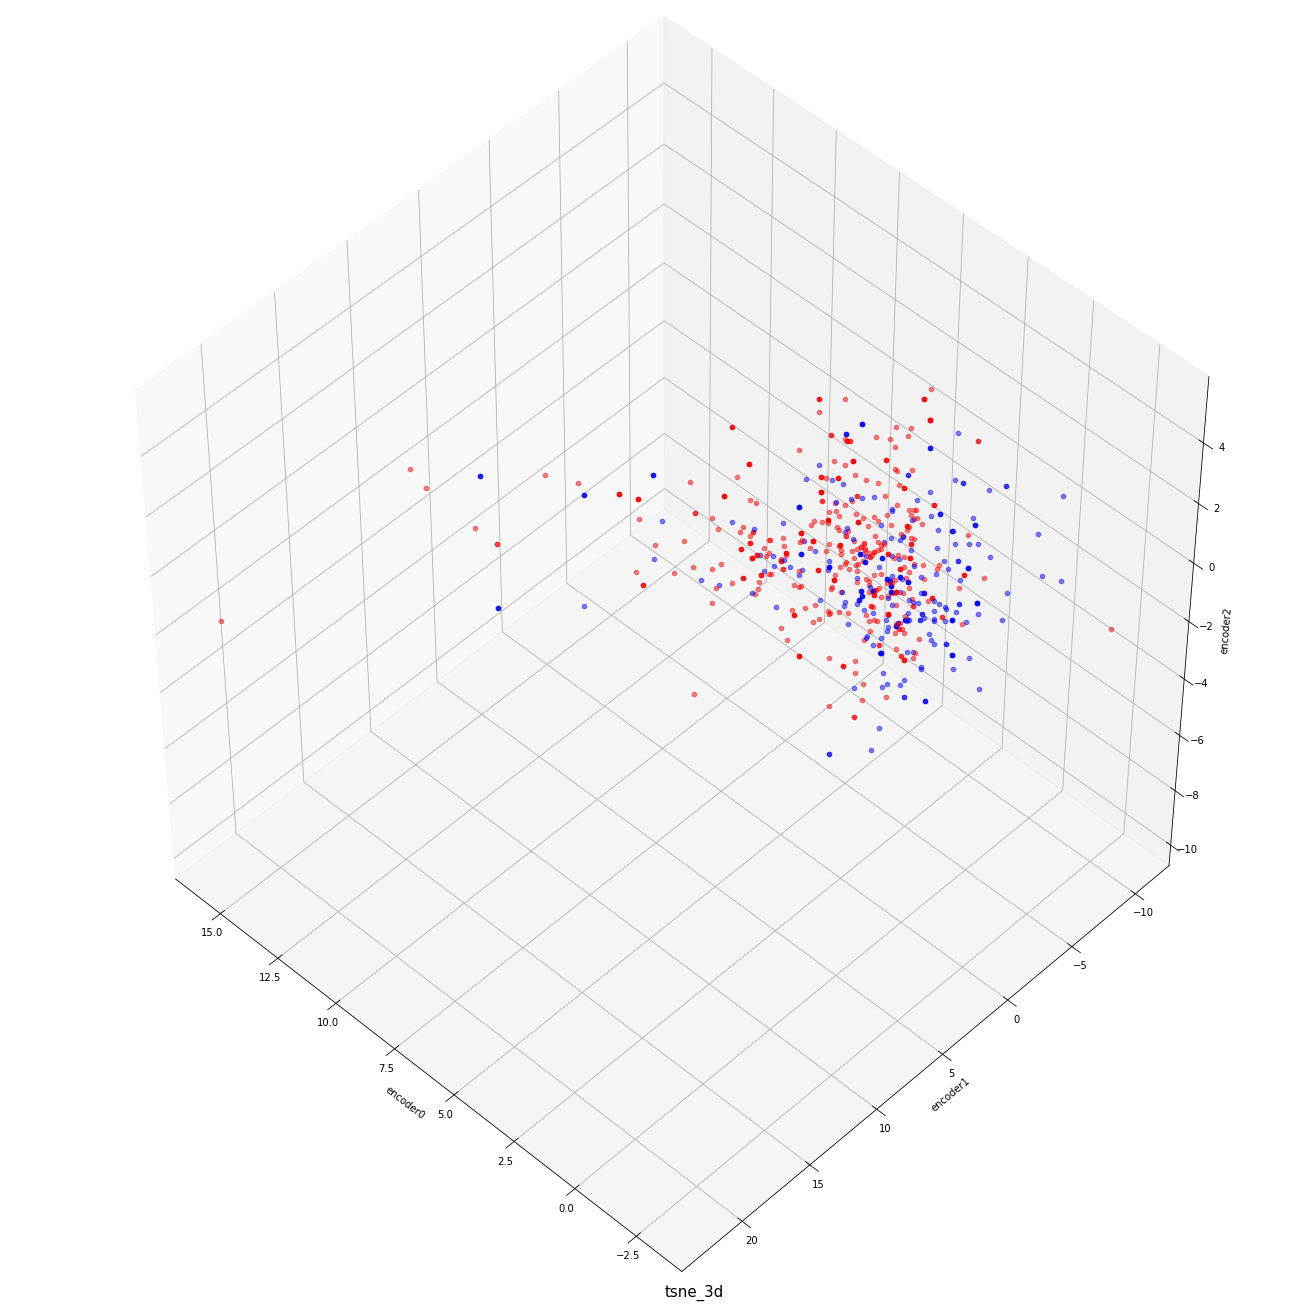

In [74]:
number = [0,1,1,1,1,1,1,0,0,0]
plot(data_total,"total",number, "autoencoder", 1,"3d")